# GUC Clustering Project 

### Mohamed Abdelwahab
### 43-18031

**Objective:** 
The objective of this project teach students how to apply clustering to real data sets

The projects aims to teach student: 
* Which clustering approach to use
* Compare between Kmeans, Hierarchal, DBScan, and Gaussian Mixtures  
* How to tune the parameters of each data approach
* What is the effect of different distance functions (optional) 
* How to evaluate clustering approachs 
* How to display the output
* What is the effect of normalizing the data 

Students in this project will use ready-made functions from Sklearn, plotnine, numpy and pandas 
 



Running this project require the following imports 

In [1]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from plotnine import *   
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
from sklearn.preprocessing import StandardScaler , MinMaxScaler , MaxAbsScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

import sklearn.metrics
from sklearn.metrics import silhouette_samples, silhouette_score, rand_score, mutual_info_score, davies_bouldin_score
from yellowbrick.cluster import SilhouetteVisualizer

from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram
import plotly.figure_factory as ff

from sklearn import metrics
from sklearn.datasets import make_blobs

import itertools
from scipy import linalg

%matplotlib inline

In [2]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'yelobrick'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],alpha = alpha,s=s)
            
            if type(km) != sklearn.cluster._agglomerative.AgglomerativeClustering and type(km) != sklearn.cluster._dbscan.DBSCAN:
                
                plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1], marker = 'x', s = 100)

## Multi Blob Data Set 
* The Data Set generated below has 6 cluster with varying number of users and varing densities
* Cluster the data set below using 



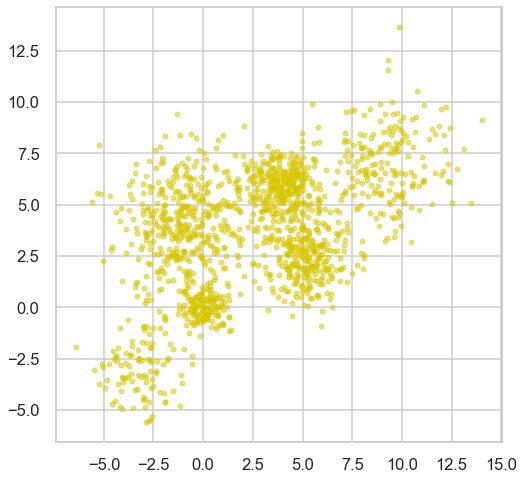

In [3]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)

In [4]:
Multi_blob_Data.shape

(1450, 2)

In [5]:
scaler = StandardScaler()
Multi_blob_Data_scaler = scaler.fit(Multi_blob_Data)
Multi_blob_Data_scaled = Multi_blob_Data_scaler.transform(Multi_blob_Data)

### Kmeans 
* Use Kmeans with different values of K to cluster the above data 
* Display the outcome of each value of K 
* Plot distortion function versus K and choose the approriate value of k 
* Plot the silhouette_score versus K and use it to choose the best K 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 

In [6]:
def Kmeans_performance(data):
    
    distortion = np.zeros((9))
    silhouette = np.zeros((9))

    for n, j in enumerate(range(2,11)):
        kmeans = KMeans(n_clusters=j, random_state=0).fit(data)
        distortion[n] = kmeans.inertia_
        silhouette[n]= silhouette_score(data, kmeans.labels_, metric='euclidean')
        if (data.shape[1] == 2):
            plt.figure()
            display_cluster(data ,km = kmeans,  num_clusters=j)
            plt.title('K = '+ str(j))
        
    plt.figure()
    plt.plot([i for i in range(2,11)], distortion)
    plt.xlabel('K')
    plt.ylabel('Distortion function cost')
    
    plt.figure()
    plt.plot([i for i in range(2,11)], silhouette)
    plt.xlabel('K')
    plt.ylabel('silhouette_score')
    
    
    best_silhouette = silhouette.max()
    best_K = silhouette.argmax() + 2 # as K starts from 2
    
    for i in range(2,11):
    
        km = KMeans(n_clusters=i, random_state=0)

        plt.figure()
        visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
        plt.title('K = '+ str(i))
        visualizer.fit(data)
        
    return (best_silhouette, best_K)

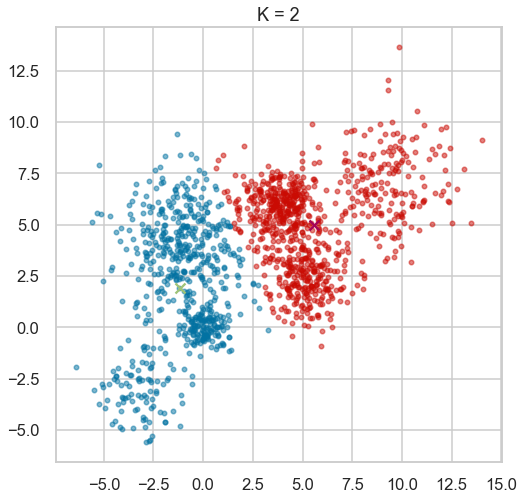

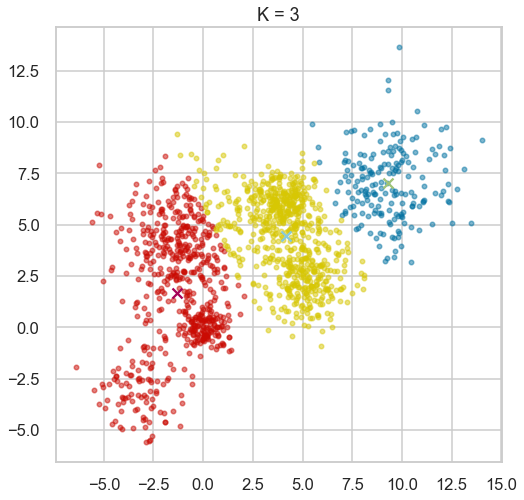

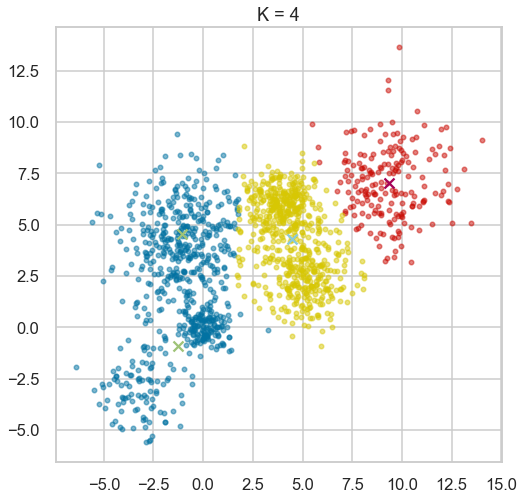

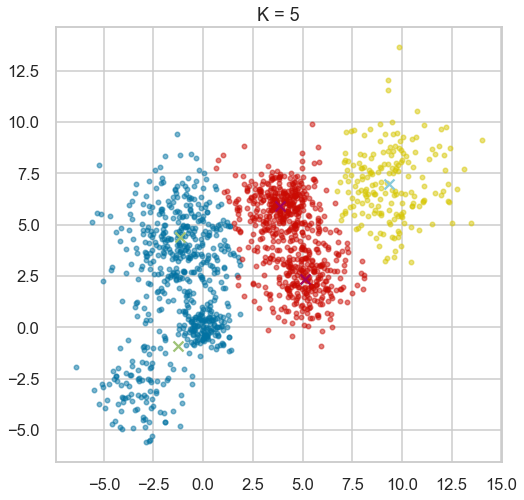

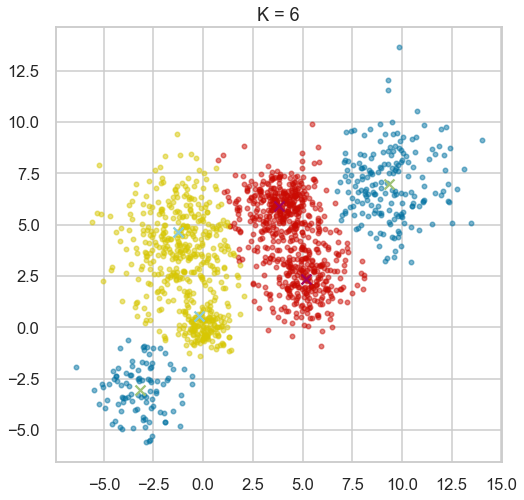

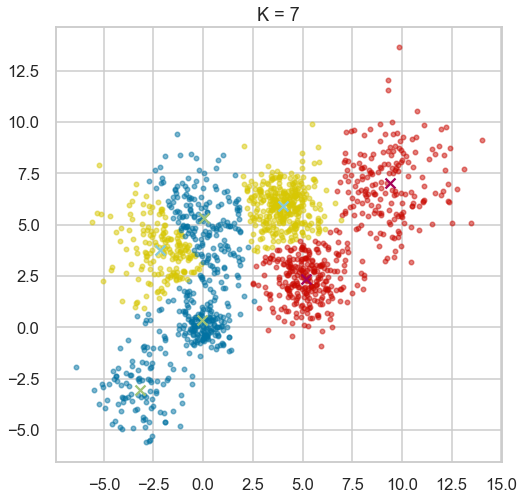

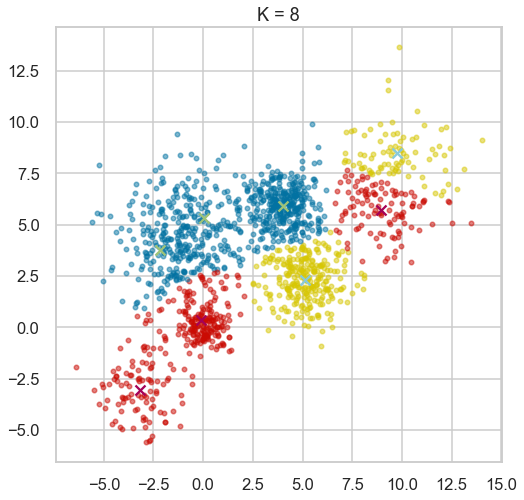

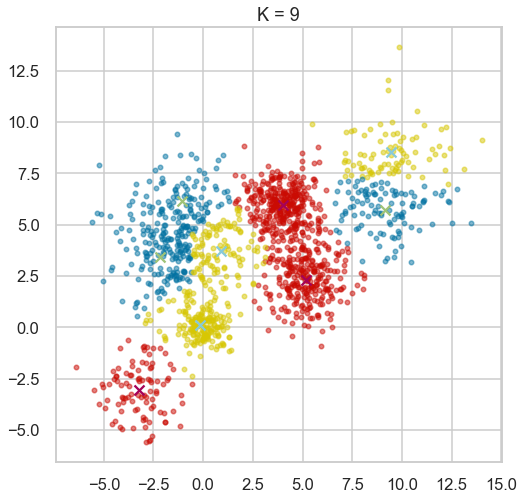

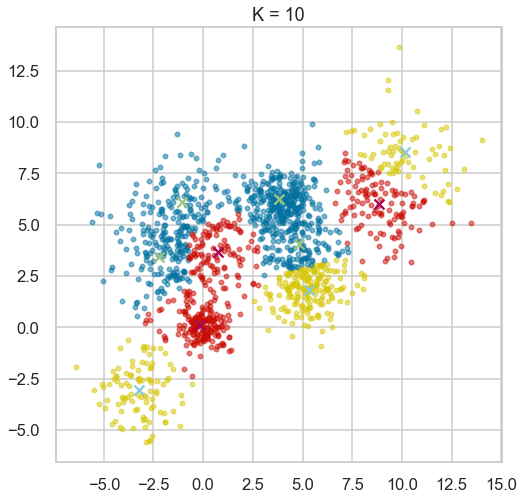

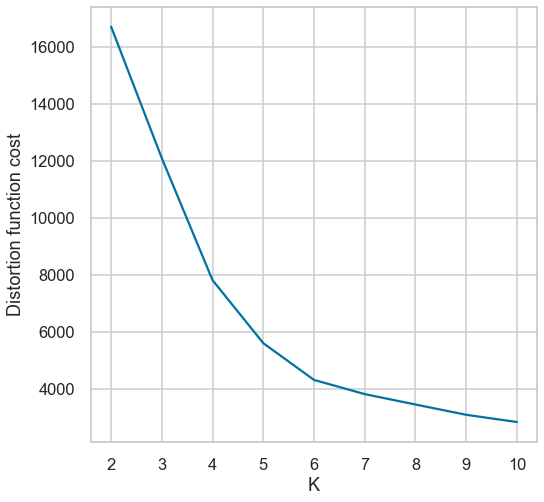

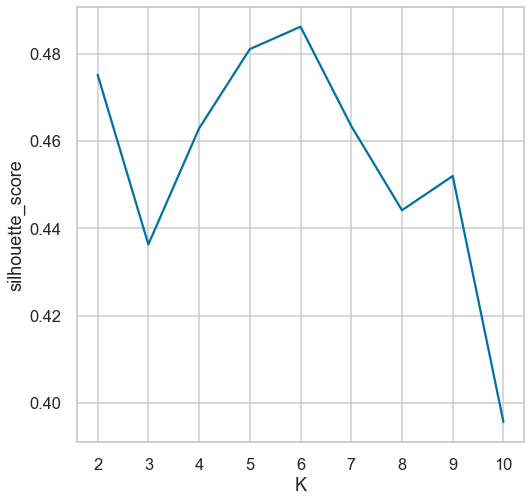

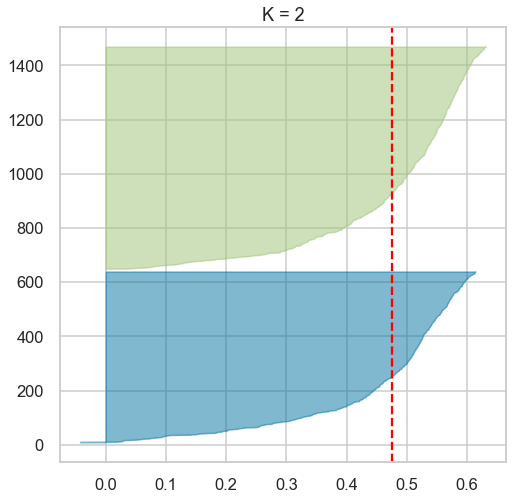

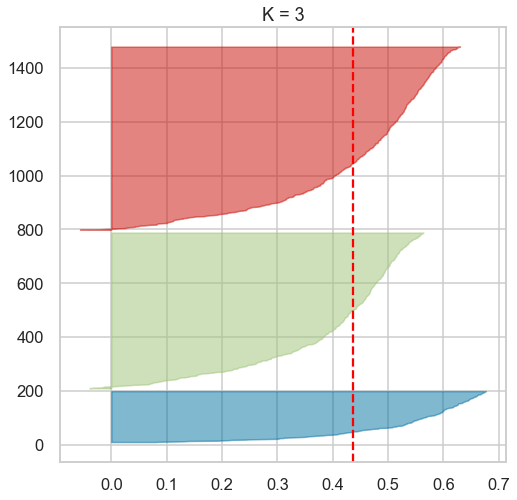

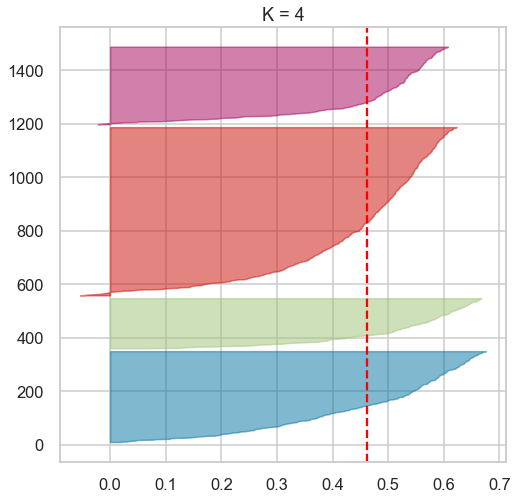

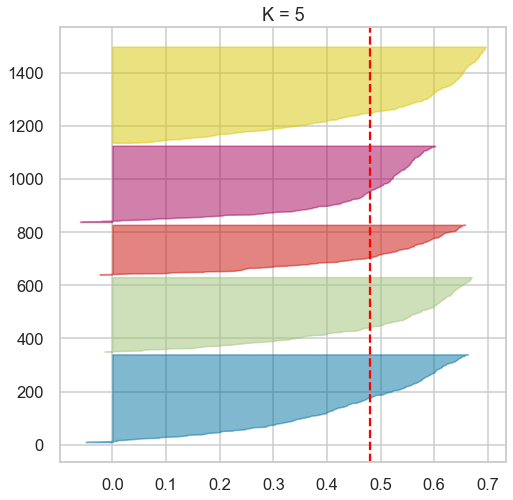

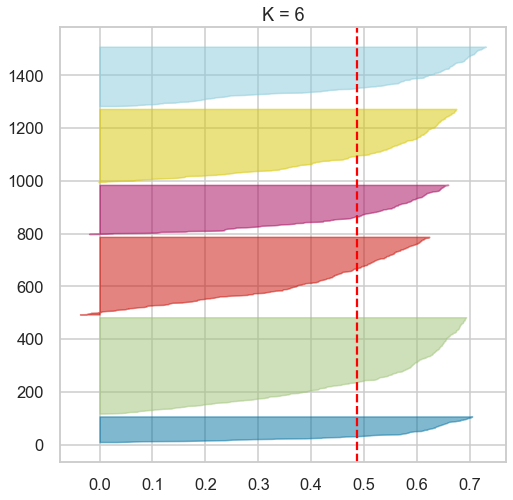

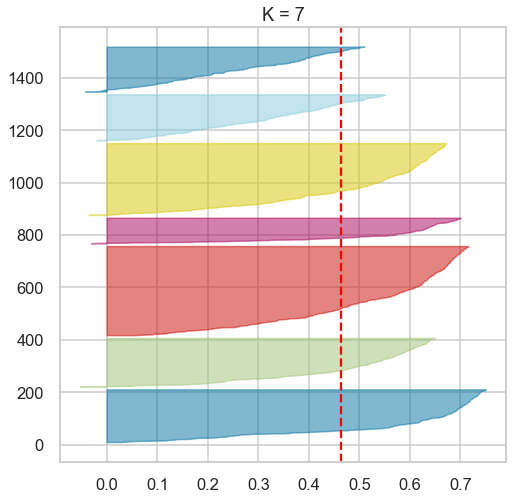

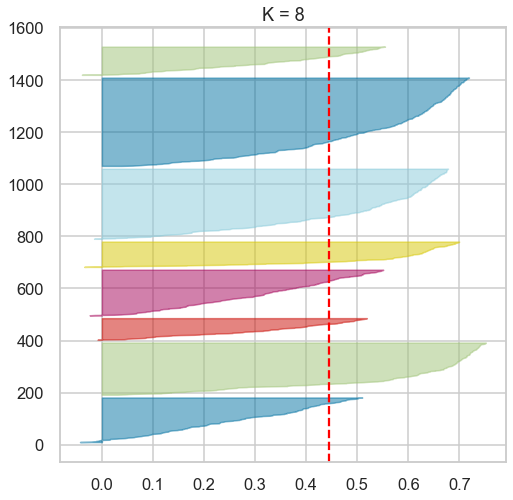

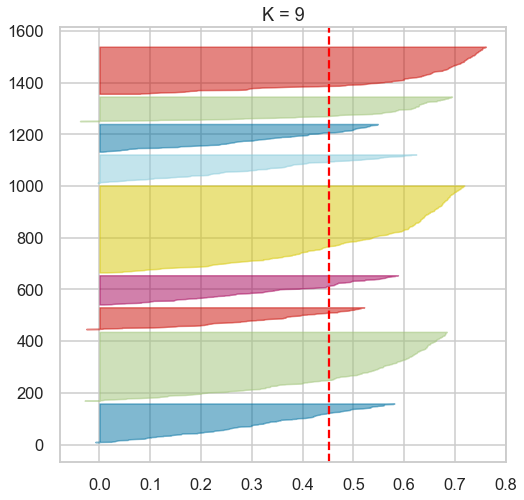

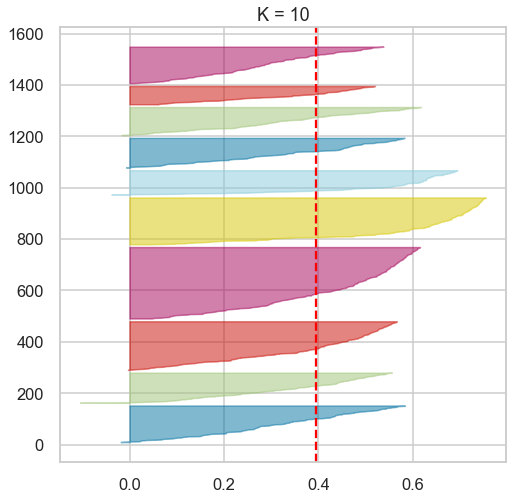

In [7]:
silhouette_Kmeans_1 , best_K1 = Kmeans_performance(Multi_blob_Data)

In [8]:
print('best_silhouette_score = '+ str(round(silhouette_Kmeans_1,3)) + ', best_K = '+ str(best_K1))

best_silhouette_score = 0.486, best_K = 6


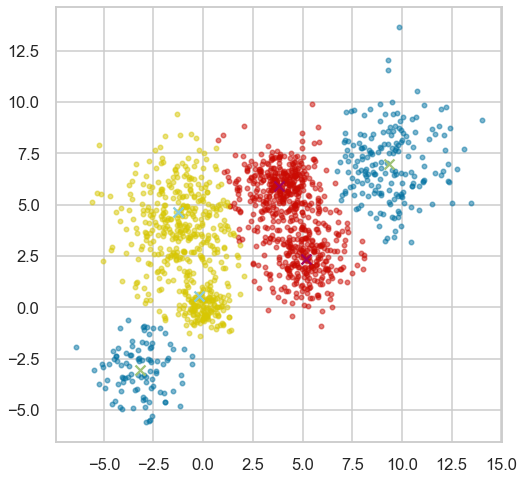

In [9]:
best_km_1 = KMeans(n_clusters = best_K1, random_state=0).fit(Multi_blob_Data)
plt.figure()
display_cluster(Multi_blob_Data ,km = best_km_1,  num_clusters=best_K1)

### now , scaled ..

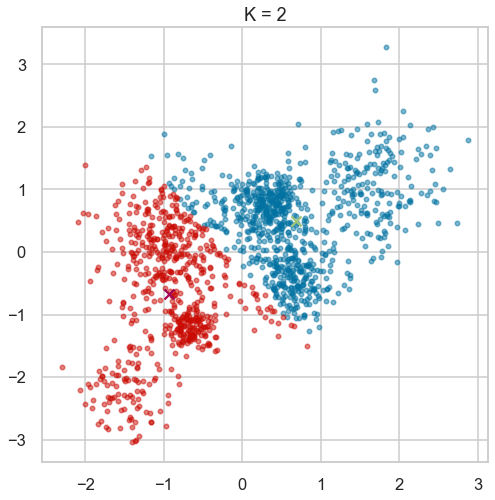

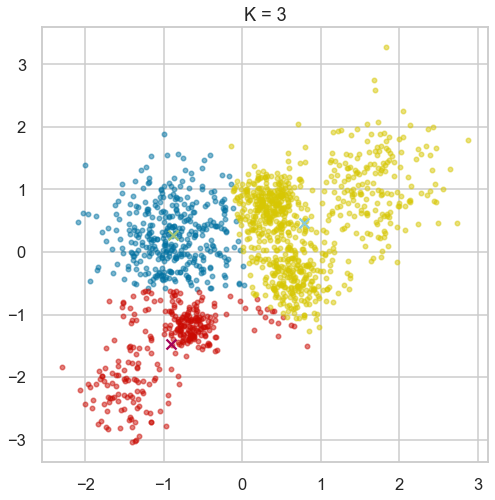

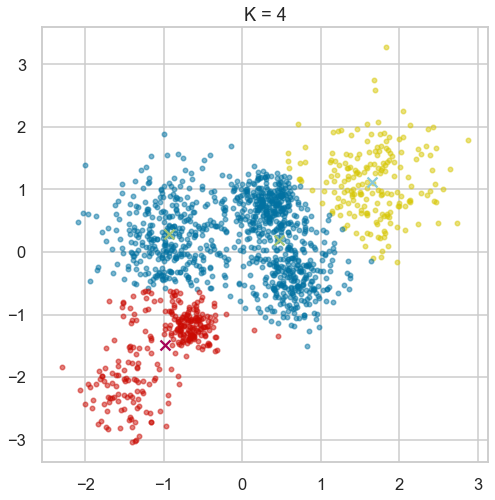

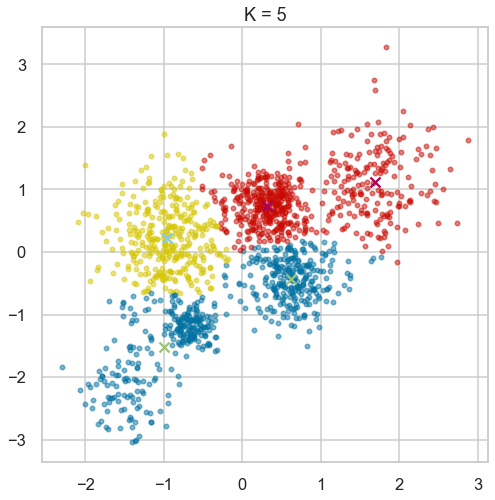

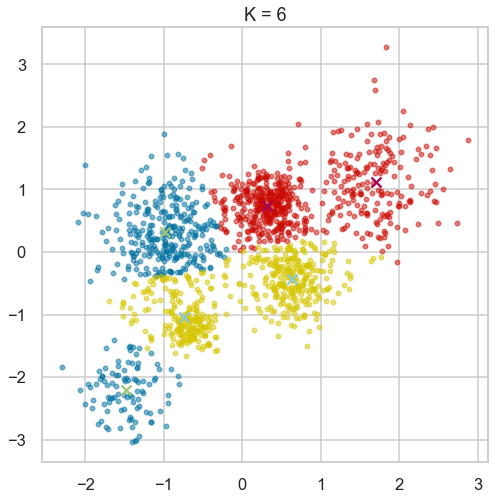

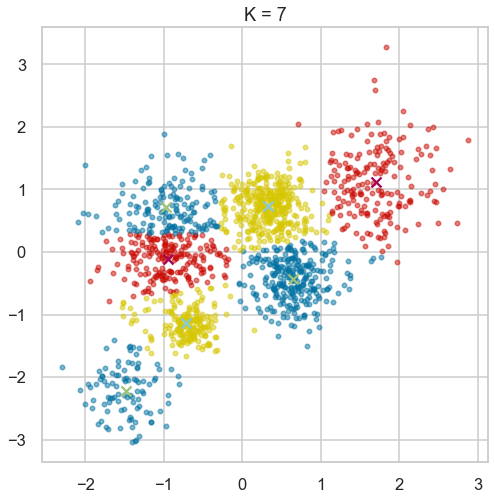

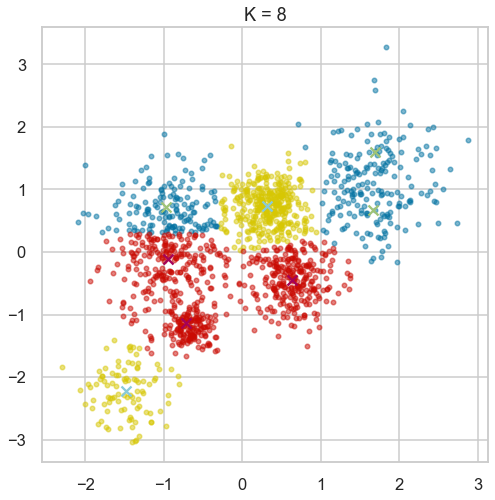

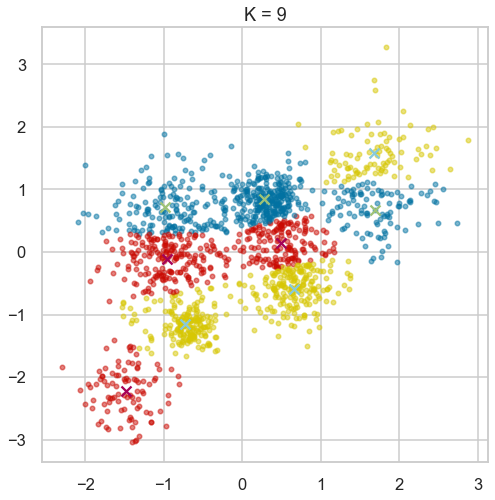

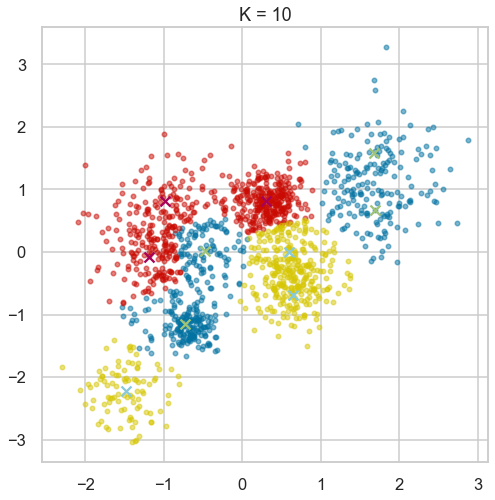

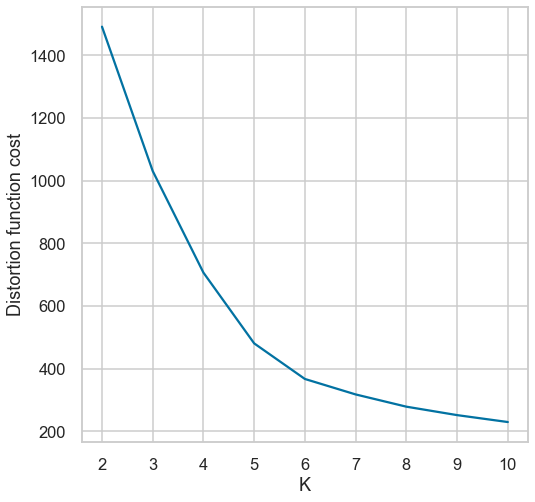

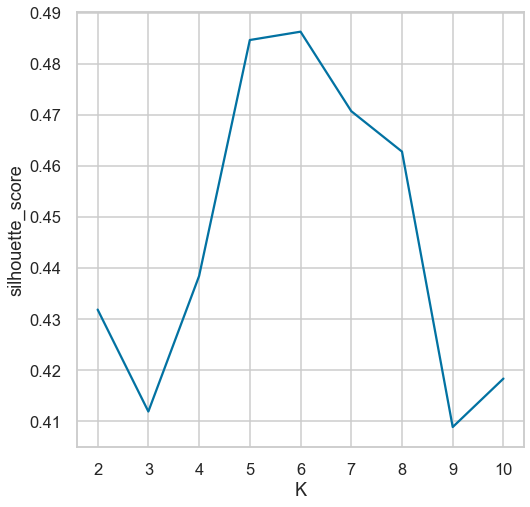

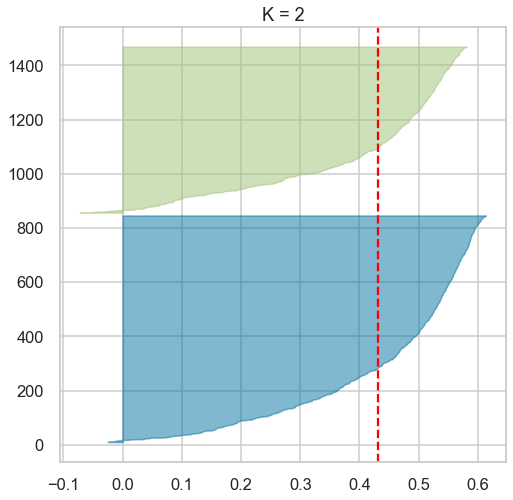

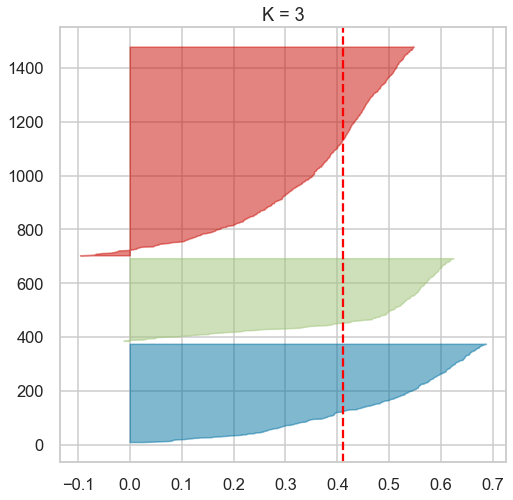

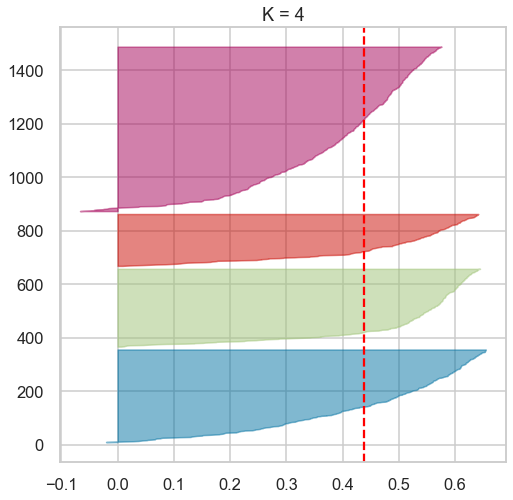

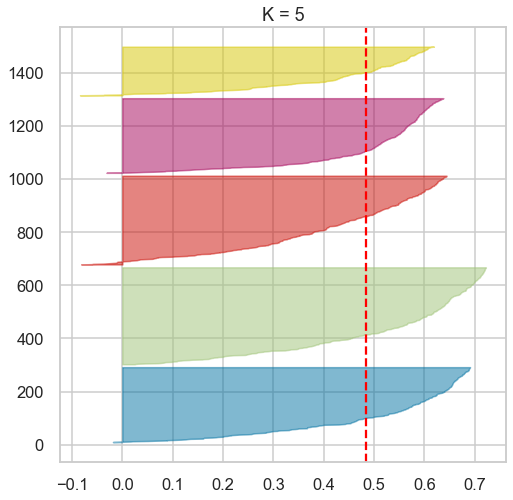

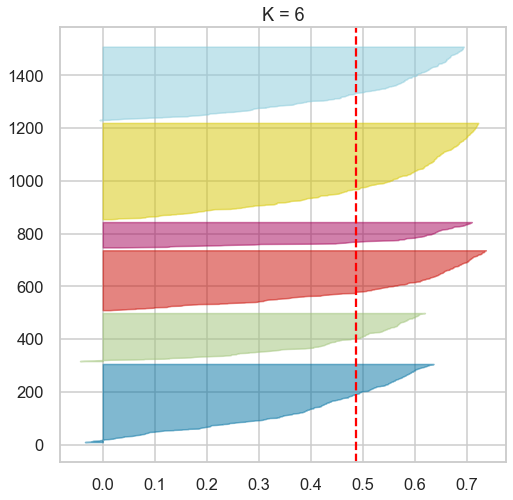

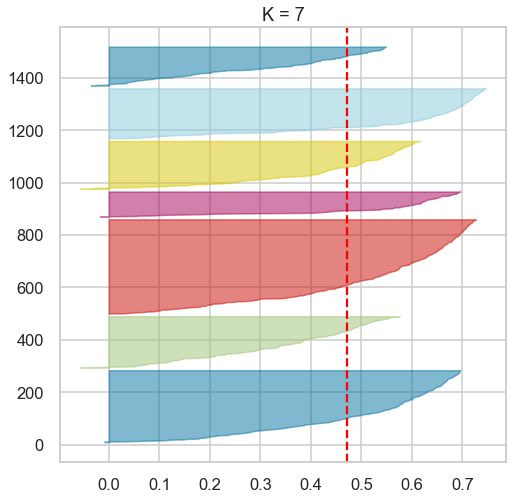

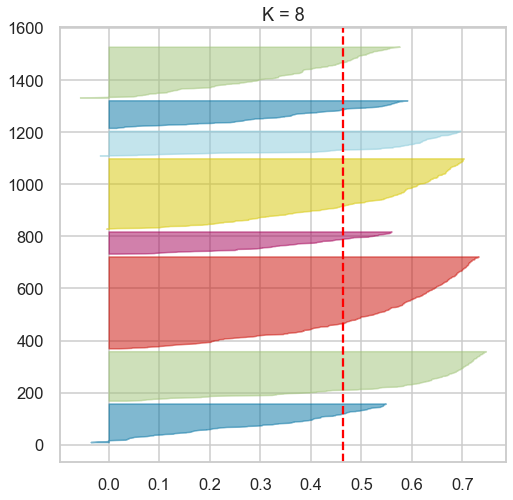

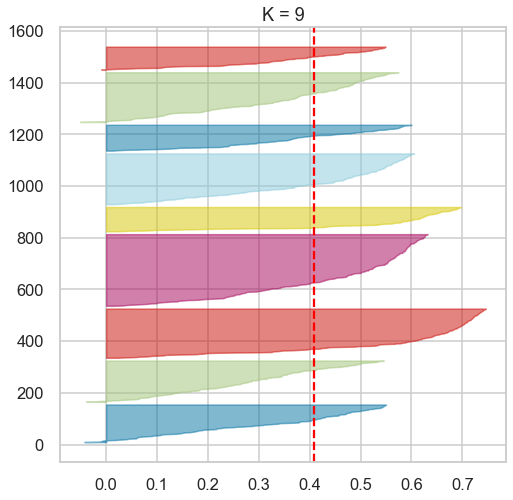

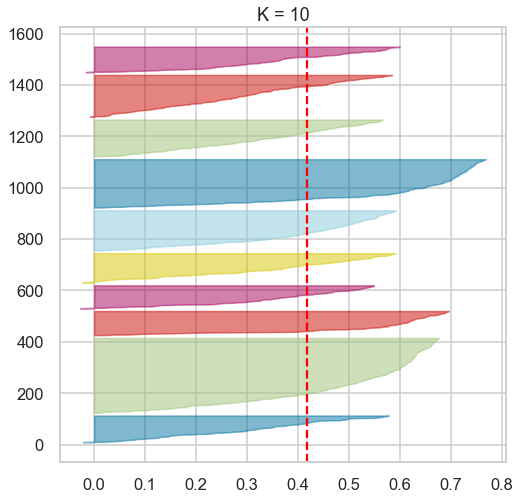

In [10]:
silhouette_Kmeans_scaled_1 , best_scaled_K1 = Kmeans_performance(Multi_blob_Data_scaled)

In [11]:
print('best_silhouette_score = '+ str(round(silhouette_Kmeans_scaled_1,3)) + ', best_K = '+ str(best_scaled_K1))

best_silhouette_score = 0.486, best_K = 6


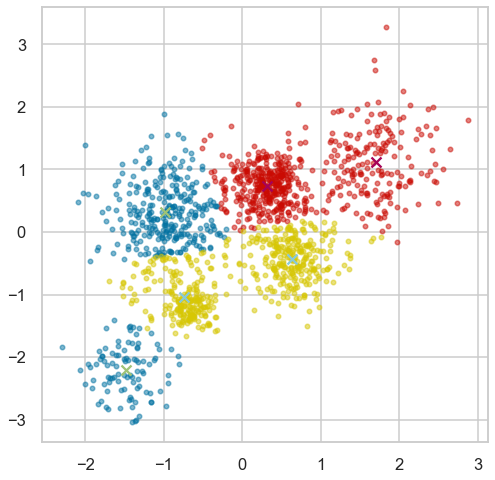

In [12]:
best_km_scaled_1 = KMeans(n_clusters = best_scaled_K1, random_state=0).fit(Multi_blob_Data_scaled)
plt.figure()
display_cluster(Multi_blob_Data_scaled ,km = best_km_scaled_1,  num_clusters=best_scaled_K1)

### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

In [13]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    

In [14]:
def AgglomerativeClustering_performance(data, Distance_threshold):
    
    affinity = [ 'euclidean', 'manhattan', 'cosine']
    linkage = ['average', 'single']
    silhouette = np.zeros((len(affinity)*len(linkage)*len(Distance_threshold)))
    i =0
    best_ac_params = {}
    for af  in affinity:
        for l in linkage:
            for d in Distance_threshold:

                ac = AgglomerativeClustering(n_clusters= None, affinity=af, linkage=l, distance_threshold=d).fit(data)
#                 plt.figure()
#                 plot_dendrogram(ac, truncate_mode="level", p=3)

                if ac.n_clusters_ != 1:
                    current_silhouette = silhouette_score(data, ac.labels_)

                    if current_silhouette > silhouette.max():

                        best_ac_params = ac.get_params()

                    silhouette[i] = current_silhouette

                i+=1

#                 if ac.n_clusters_ != 1 and data.shape[1] == 2 :
#                     plt.figure()
#                     display_cluster(data ,km =ac, num_clusters = ac.n_clusters_)
#                     plt.title('n_clusters = '+ str(ac.n_clusters_)+', affinity = '+ af + ', linkage = ' +l 
#                               +  ', Distance_threshold = ' + str(d) 
#                               + ', silhouette = ' + str(round(current_silhouette,3)))
                    
    plt.figure()
    plt.plot([i for i in range(0,len(affinity)*len(linkage)*len(Distance_threshold))], silhouette)
    plt.xlabel('trials')
    plt.ylabel('silhouette_score')
    
    best_silhouette = silhouette.max()
    return best_silhouette, best_ac_params

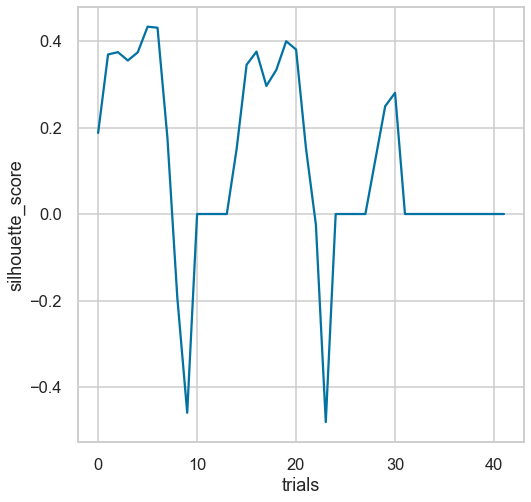

In [15]:
Distance_threshold = [0.1, 0.3, 0.5, 3, 4, 5, 6]
silhouette_ac_1 , best_ac_params1 = AgglomerativeClustering_performance(Multi_blob_Data, Distance_threshold)

In [16]:
silhouette_ac_1 , best_ac_params1

(0.433187948807373,
 {'affinity': 'euclidean',
  'compute_distances': False,
  'compute_full_tree': 'auto',
  'connectivity': None,
  'distance_threshold': 5,
  'linkage': 'average',
  'memory': None,
  'n_clusters': None})

n_clusters = 5
silhouette_score = 0.433


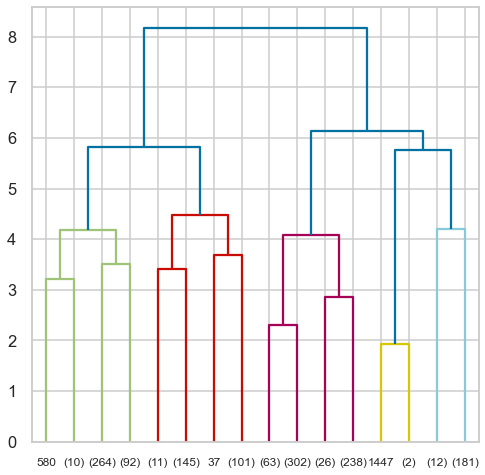

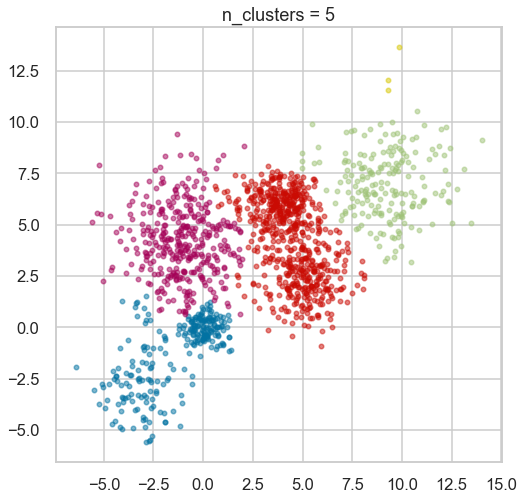

In [17]:
best_ac = AgglomerativeClustering(n_clusters=None, affinity=best_ac_params1['affinity'], linkage=best_ac_params1['linkage']
                                  , distance_threshold=best_ac_params1['distance_threshold']).fit(Multi_blob_Data)

plt.figure()
plot_dendrogram(best_ac, truncate_mode="level", p=3)

print('n_clusters = '+ str(best_ac.n_clusters_))

plt.figure()
display_cluster(Multi_blob_Data ,km =best_ac, num_clusters = best_ac.n_clusters_)
plt.title('n_clusters = '+ str(best_ac.n_clusters_))
print('silhouette_score = ' + str(round(silhouette_score(Multi_blob_Data, best_ac.labels_),3)))

### now , scaled ..

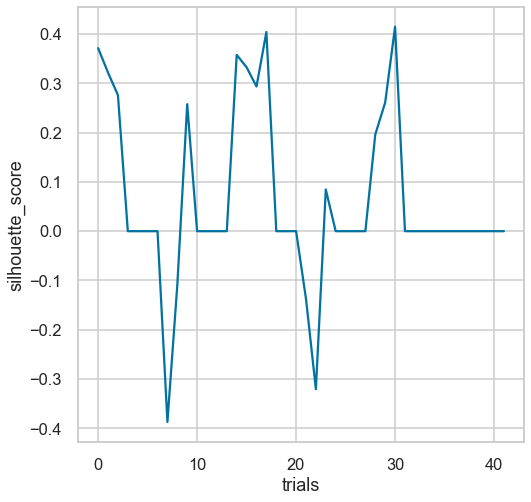

In [18]:
Distance_threshold = [0.1, 0.3, 0.5, 3, 4, 5, 6]
silhouette_ac_scaled_1 , best_ac_scaled_params1 = AgglomerativeClustering_performance(Multi_blob_Data_scaled, Distance_threshold = [0.1, 0.3, 0.5, 3, 4, 5, 6])

In [19]:
silhouette_ac_scaled_1 , best_ac_scaled_params1

(0.41474732821165217,
 {'affinity': 'cosine',
  'compute_distances': False,
  'compute_full_tree': 'auto',
  'connectivity': None,
  'distance_threshold': 0.5,
  'linkage': 'average',
  'memory': None,
  'n_clusters': None})

n_clusters = 4
silhouette_score = 0.415


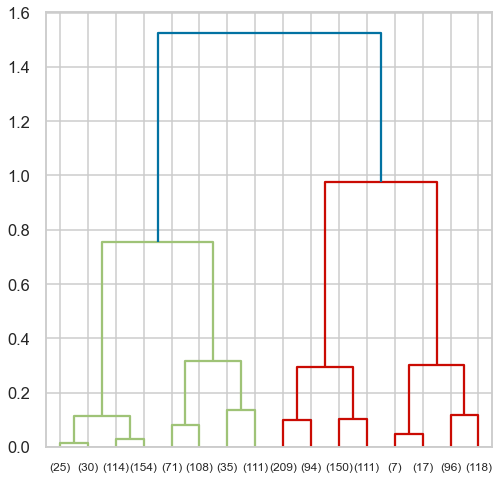

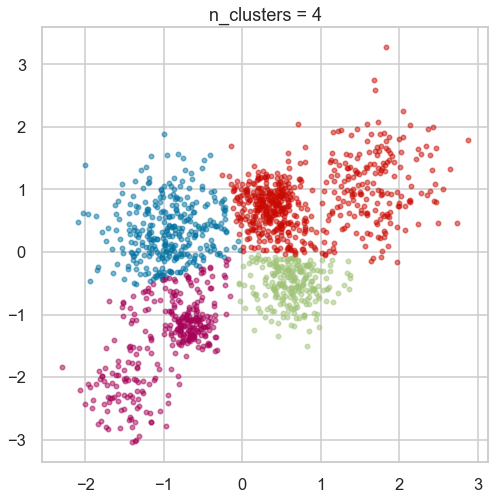

In [20]:
best_ac_scaled = AgglomerativeClustering(n_clusters=None, affinity=best_ac_scaled_params1['affinity'], 
                                         linkage=best_ac_scaled_params1['linkage'], 
                                         distance_threshold=best_ac_scaled_params1['distance_threshold']).fit(Multi_blob_Data_scaled)

plt.figure()
plot_dendrogram(best_ac_scaled, truncate_mode="level", p=3)

print('n_clusters = '+ str(best_ac_scaled.n_clusters_))

plt.figure()
display_cluster(Multi_blob_Data_scaled ,km =best_ac_scaled, num_clusters = best_ac_scaled.n_clusters_)
plt.title('n_clusters = '+ str(best_ac_scaled.n_clusters_))
print('silhouette_score = ' + str(round(silhouette_score(Multi_blob_Data_scaled, best_ac_scaled.labels_),3)))

### DBScan
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments 

In [21]:
def DBScan_performance(data):
    
    eps = np.arange(0.1, 3.1, 0.1)
    min_samples = np.arange(5,26)
    silhouette = np.zeros((len(eps)*len(min_samples)))
    i =0
    best_dbscan_params = {}

    for e  in eps:
        for ms in min_samples:

            # Compute DBSCAN
            db = DBSCAN(eps=e, min_samples=ms).fit(data)
            core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
            core_samples_mask[db.core_sample_indices_] = True
            labels = db.labels_
            # Number of clusters in labels, ignoring noise if present.
            n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
            n_noise_ = list(labels).count(-1)

#             print("Estimated number of clusters: %d" % n_clusters_)
#             print("Estimated number of noise points: %d" % n_noise_)



            if db.labels_.var() != 0:
#                 print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(data, labels))
                current_silhouette = silhouette_score(data, db.labels_)
            else:
                current_silhouette = 0
            if current_silhouette > silhouette.max():

                best_dbscan_params = db.get_params()

            silhouette[i] = current_silhouette
            i+=1
            
            
    plt.figure()
    plt.plot([i for i in range(0,len(eps)*len(min_samples))], silhouette)
    plt.xlabel('trials')
    plt.ylabel('silhouette_score')
    
    best_silhouette = silhouette.max()
    
    return best_silhouette , best_dbscan_params

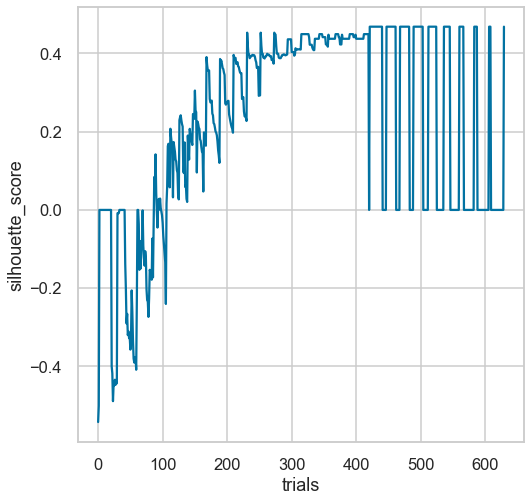

In [22]:
silhouette_db_1 , best_db_params1 = DBScan_performance(Multi_blob_Data)

In [23]:
silhouette_db_1 , best_db_params1 

(0.4685207355522043,
 {'algorithm': 'auto',
  'eps': 2.1,
  'leaf_size': 30,
  'metric': 'euclidean',
  'metric_params': None,
  'min_samples': 6,
  'n_jobs': None,
  'p': None})

Text(0.5, 1.0, 'n_clusters = 1, eps = 2.1, min_samples = 6, leaf_size = 30, silhouette = 0.469')

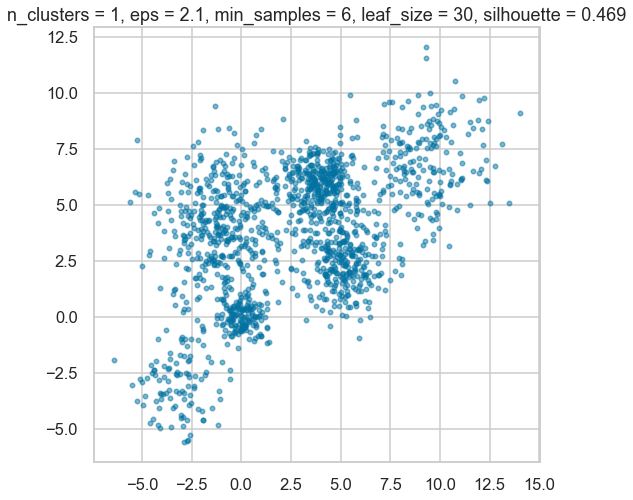

In [24]:
best_db = DBSCAN(eps = best_db_params1['eps'], min_samples= best_db_params1['min_samples']).fit(Multi_blob_Data)

labels = best_db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

display_cluster(Multi_blob_Data,km = best_db, num_clusters= n_clusters_)  

plt.title('n_clusters = '+ str(n_clusters_)+', eps = ' + str(best_db_params1['eps']) 
          + ', min_samples = '+ str(best_db_params1['min_samples'])
          + ', leaf_size = '+ str(best_db_params1['leaf_size'])
          + ', silhouette = '  + str(round(silhouette_score(Multi_blob_Data, best_db.labels_),3)))

### now , scaled ..

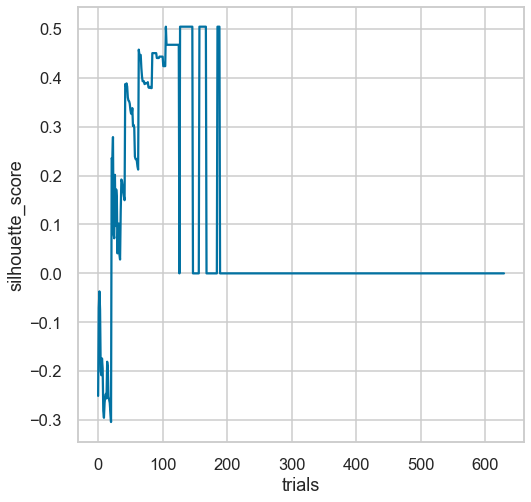

In [25]:
silhouette_db_scaled_1 , best_db_scaled_params1 = DBScan_performance(Multi_blob_Data_scaled)

In [26]:
silhouette_db_scaled_1 , best_db_scaled_params1 

(0.5047268616466032,
 {'algorithm': 'auto',
  'eps': 0.6,
  'leaf_size': 30,
  'metric': 'euclidean',
  'metric_params': None,
  'min_samples': 5,
  'n_jobs': None,
  'p': None})

Text(0.5, 1.0, 'n_clusters = 1, eps = 0.6, min_samples = 5, silhouette = 0.505')

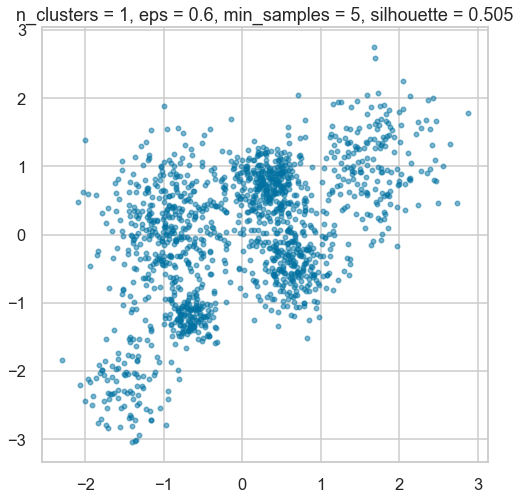

In [27]:
best_db_scaled = DBSCAN(eps = best_db_scaled_params1['eps'], 
                 min_samples= best_db_scaled_params1['min_samples']).fit(Multi_blob_Data_scaled)

labels = best_db_scaled.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

display_cluster(Multi_blob_Data_scaled,km = best_db_scaled, num_clusters= n_clusters_)  

plt.title('n_clusters = '+ str(n_clusters_)+', eps = ' + str(best_db_scaled_params1['eps']) 
          + ', min_samples = '+ str(best_db_scaled_params1['min_samples'])+ 
                  ', silhouette = '  + str(round(silhouette_score(Multi_blob_Data_scaled, best_db_scaled.labels_),3)))

### Gaussian Mixture
* Use GaussianMixture function to cluster the above data 
* In GMM change the covariance_type and check the difference in the resulting proabability fit 
* Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 

In [28]:
def bivariate_normal(X, Y, sigmax=1.0, sigmay=1.0,
                 mux=0.0, muy=0.0, sigmaxy=0.0):

    Xmu = X-mux
    Ymu = Y-muy

    rho = sigmaxy/(sigmax*sigmay)
    z = Xmu**2/sigmax**2 + Ymu**2/sigmay**2 - 2*rho*Xmu*Ymu/(sigmax*sigmay)
    denom = 2*np.pi*sigmax*sigmay*np.sqrt(1-rho**2)
    return np.exp(-z/(2*(1-rho**2))) / denom

def plot_contours(data,gmm, means, covs, title):
    plt.figure()
    plt.plot([x[0] for x in data], [y[1] for y in data],'ko') # data

    delta = 0.025
    k = len(means)
    x = np.arange(-2.0, 7.0, delta)
    y = np.arange(-2.0, 7.0, delta)
    X, Y = np.meshgrid(x, y)
    col = ['green', 'red', 'indigo']
    for i in range(k):
        
        if gmm.covariance_type == "full":
            cov = covs[i]
        elif gmm.covariance_type == "tied":
            cov = covs
        elif gmm.covariance_type == "diag":
            cov = np.diag(covs[i][:2])
        elif gmm.covariance_type == "spherical":
            cov = np.eye(means.shape[1]) * covs[i]
            
        mean = means[i]
#         cov = covs[i]
#         print(cov)
#         print('#############')
#         print(i)
#         print('#############')
        sigmax = np.sqrt(cov[0][0])
        sigmay = np.sqrt(cov[1][1])
        sigmaxy = cov[0][1]/(sigmax*sigmay)
        Z = bivariate_normal(X, Y, sigmax, sigmay, mean[0], mean[1], sigmaxy)
        plt.contour(X, Y, Z)
        plt.title(title)
    plt.rcParams.update({'font.size':16})
    plt.tight_layout()
    
    
color_iter = itertools.cycle(["navy", "c", "cornflowerblue", "gold", "darkorange"])


def Gaussian_Mixture_performance(data):
    n_comps = np.arange(2, 15)
    cov = ['full', 'tied', 'diag', 'spherical']
    silhouette = np.zeros((len(n_comps)*len(cov)))
    i = 0
    best_gmm_params = {}

    for n  in n_comps:
        for c in cov:

            gmm = GaussianMixture(n_components= n, covariance_type= c, random_state = 0).fit(data)
            labels = gmm.predict(data)

            current_silhouette = silhouette_score(data, labels)

            if current_silhouette > silhouette.max():

                    best_gmm_params = gmm.get_params()

            silhouette[i] = current_silhouette
            i+=1
#             if data.shape[1] == 2:

#             plt.figure()
#             plot_contours(data,gmm, gmm.means_, gmm.covariances_, title= "n_components = " + str(n) 
#                          + ', covariance_type = ' + c 
#                         + ', silhouette = ' + str(round(current_silhouette,3)))
            
    plt.figure()
    plt.plot([i for i in range(0,len(n_comps)*len(cov))], silhouette)
    plt.xlabel('trials')
    plt.ylabel('silhouette_score')

    best_silhouette = silhouette.max()
    
    return best_silhouette, best_gmm_params

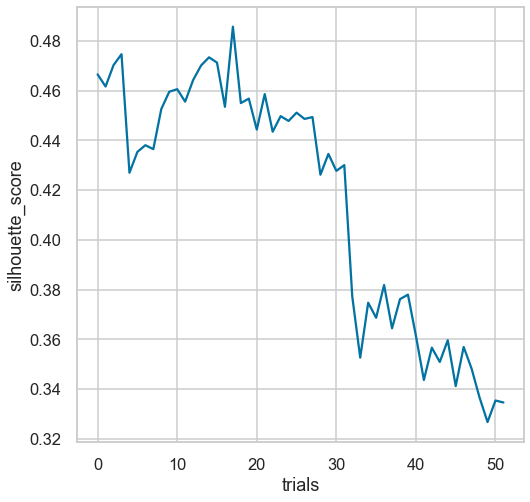

In [29]:
silhouette_gmm_1, best_gmm_params1 = Gaussian_Mixture_performance(Multi_blob_Data)

In [30]:
silhouette_gmm_1, best_gmm_params1

(0.48567327695888446,
 {'covariance_type': 'tied',
  'init_params': 'kmeans',
  'max_iter': 100,
  'means_init': None,
  'n_components': 6,
  'n_init': 1,
  'precisions_init': None,
  'random_state': 0,
  'reg_covar': 1e-06,
  'tol': 0.001,
  'verbose': 0,
  'verbose_interval': 10,
  'warm_start': False,
  'weights_init': None})

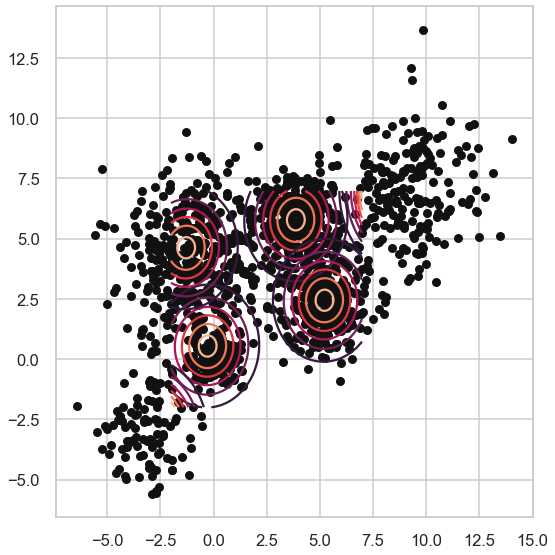

In [31]:
best_gmm = GaussianMixture(n_components= best_gmm_params1['n_components'], 
                      covariance_type= best_gmm_params1['covariance_type']).fit(Multi_blob_Data)

plot_contours(Multi_blob_Data, best_gmm, best_gmm.means_, best_gmm.covariances_, title="")


### now , scaled ..

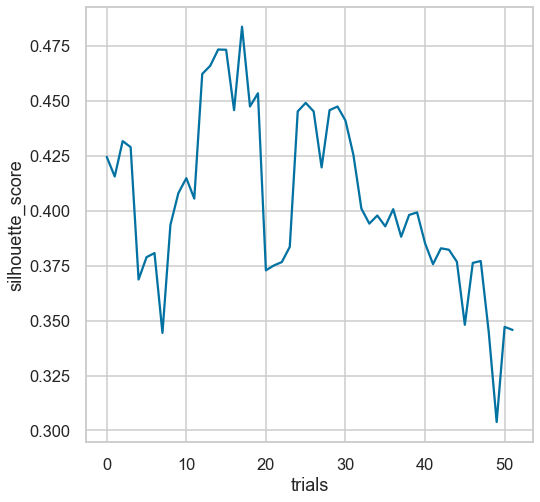

In [32]:
silhouette_gmm_scaled_1, best_gmm_scaled_params1 = Gaussian_Mixture_performance(Multi_blob_Data_scaled)

In [33]:
silhouette_gmm_scaled_1, best_gmm_scaled_params1

(0.4838179834679896,
 {'covariance_type': 'tied',
  'init_params': 'kmeans',
  'max_iter': 100,
  'means_init': None,
  'n_components': 6,
  'n_init': 1,
  'precisions_init': None,
  'random_state': 0,
  'reg_covar': 1e-06,
  'tol': 0.001,
  'verbose': 0,
  'verbose_interval': 10,
  'warm_start': False,
  'weights_init': None})

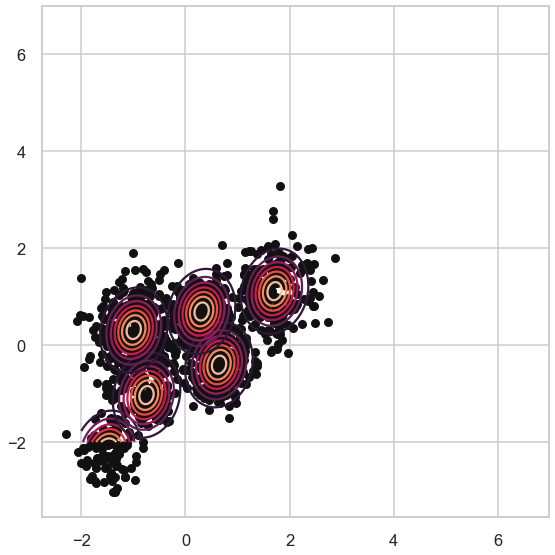

In [34]:
best_gmm_scaled = GaussianMixture(n_components= best_gmm_scaled_params1['n_components'], 
                      covariance_type= best_gmm_scaled_params1['covariance_type']).fit(Multi_blob_Data_scaled)

plot_contours(Multi_blob_Data_scaled, best_gmm_scaled, best_gmm_scaled.means_, best_gmm_scaled.covariances_, title="")

## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers 

The data represents three classes 


In [35]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']


['setosa', 'versicolor', 'virginica']

* Repeat all the above clustering approaches and steps on the above data 
* Normalize the data then repeat all the above steps 
* Compare between the different clustering approaches 

In [36]:
iris_x = iris_data.data
iris_y = iris_data.target

In [37]:
iris_x_scaled = scaler.fit_transform(iris_x)

### Kmeans 
* Use Kmeans with different values of K to cluster the above data 
* Display the outcome of each value of K 
* Plot distortion function versus K and choose the approriate value of k 
* Plot the silhouette_score versus K and use it to choose the best K 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 

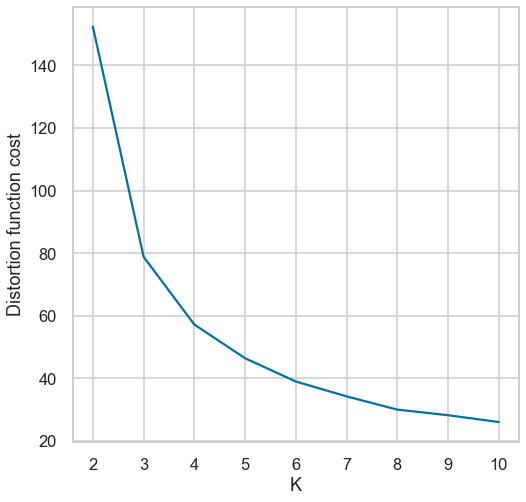

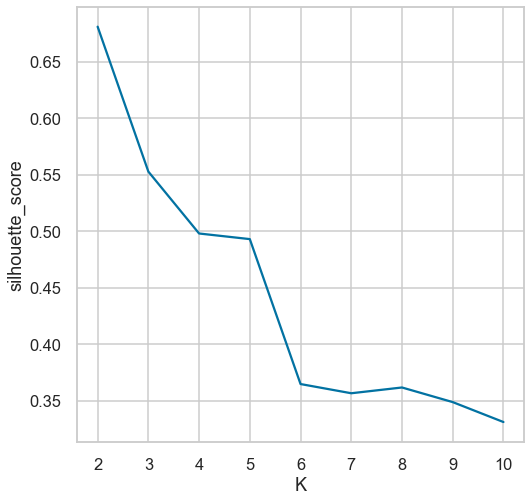

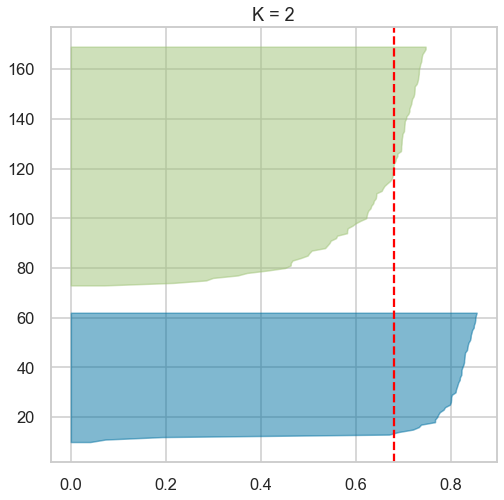

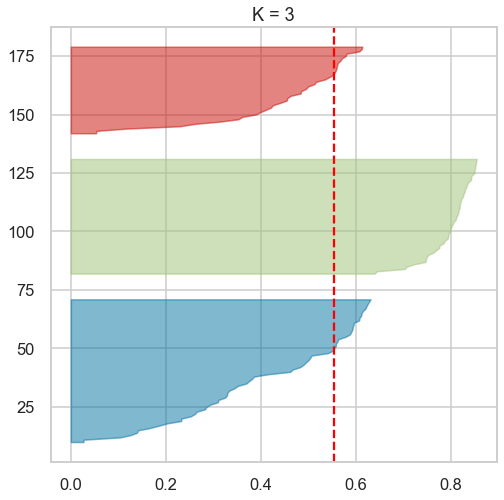

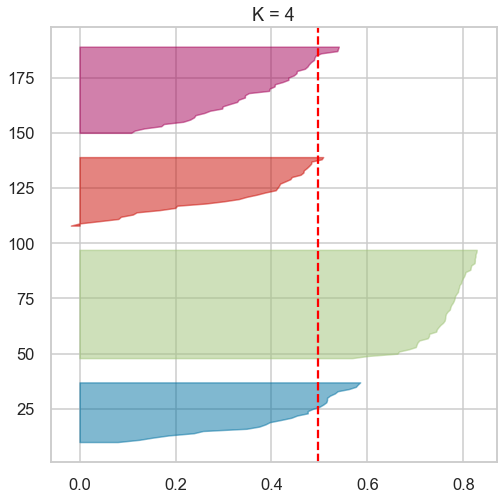

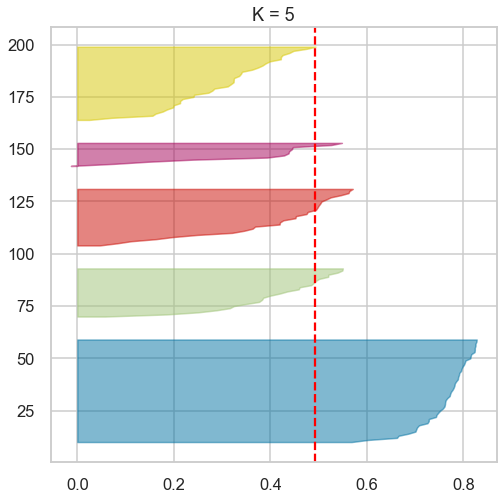

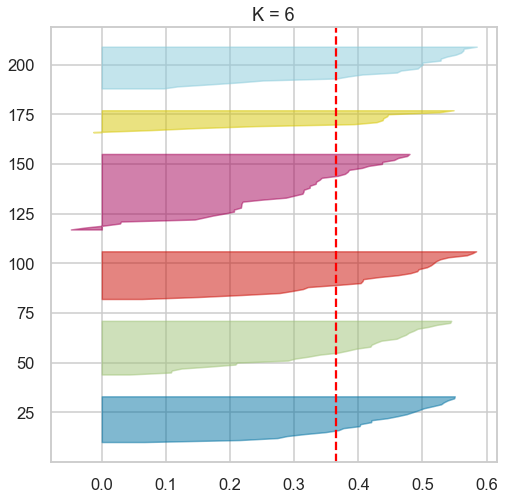

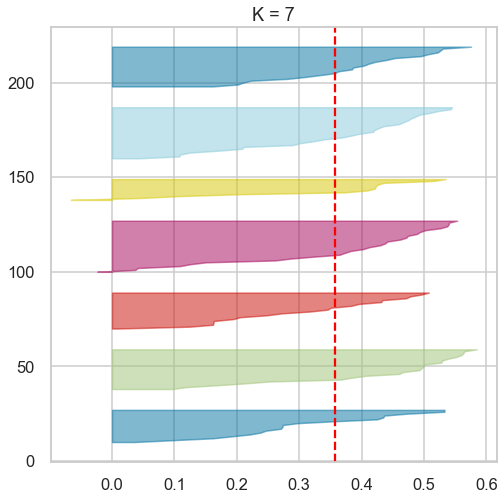

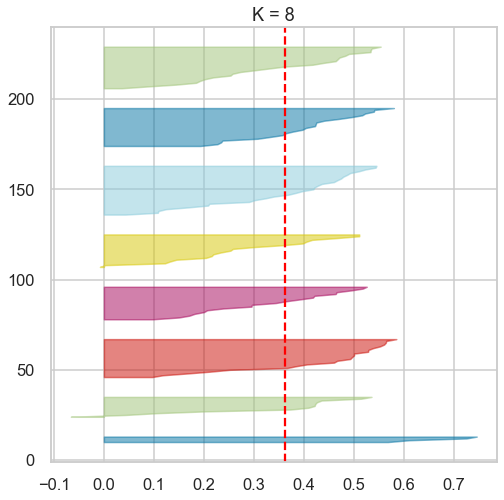

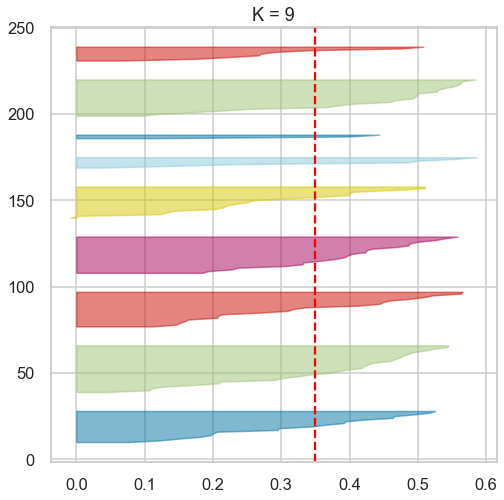

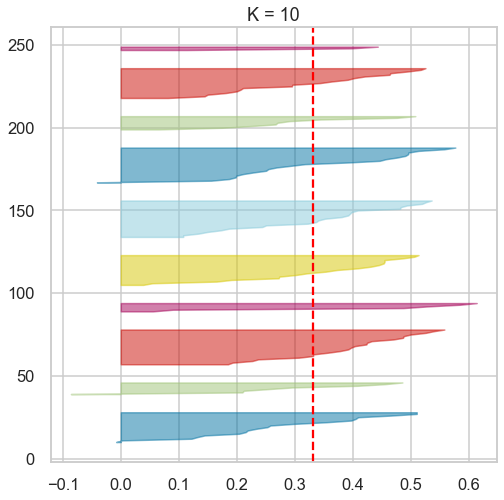

In [38]:
silhouette_Kmeans_2 , best_K2 = Kmeans_performance(iris_x)

In [39]:
print('best_silhouette_score = '+ str(round(silhouette_Kmeans_2,3)) + ', best_K = '+ str(best_K2))

best_silhouette_score = 0.681, best_K = 2


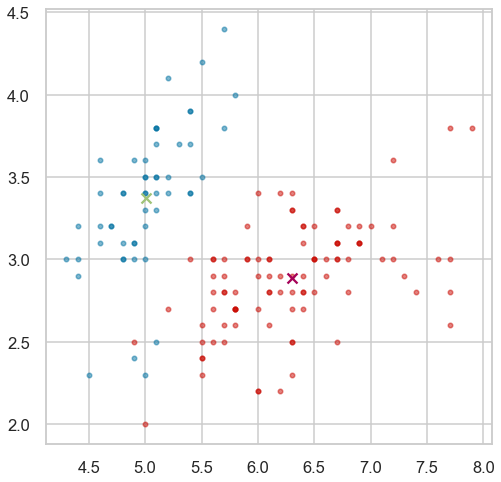

In [40]:
best_km_2 = KMeans(n_clusters = best_K2, random_state=0).fit(iris_x)
plt.figure()
display_cluster(iris_x ,km = best_km_2,  num_clusters=best_K2)

### now , scaled ..

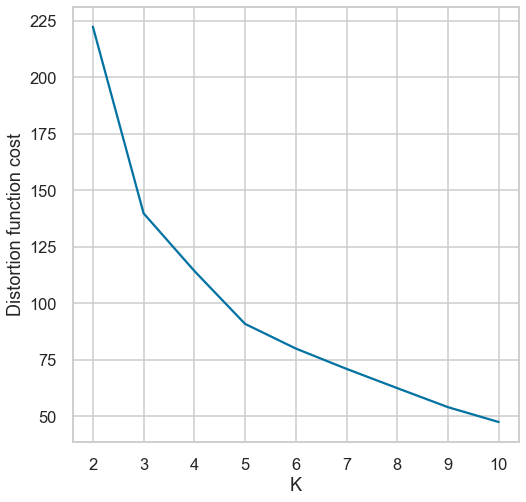

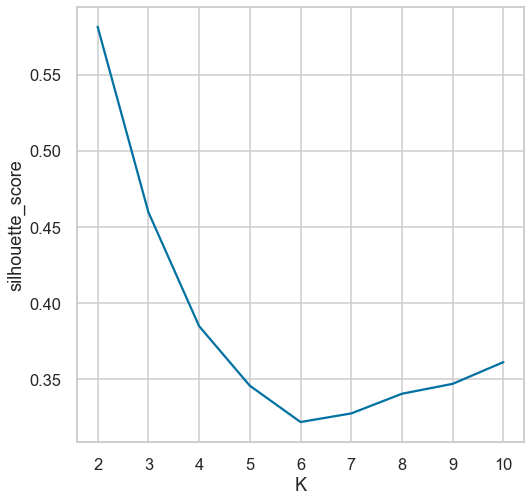

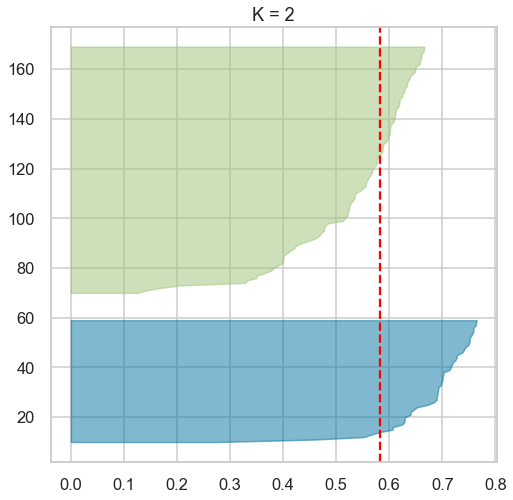

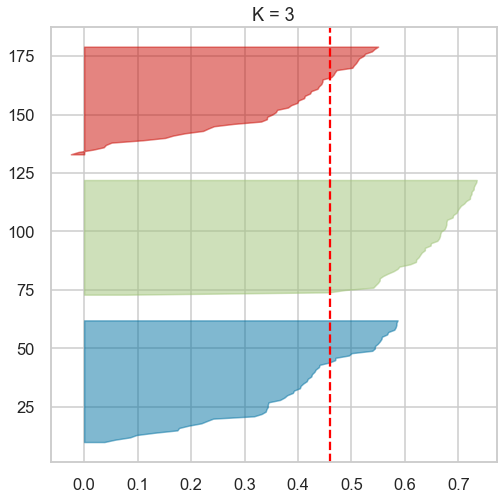

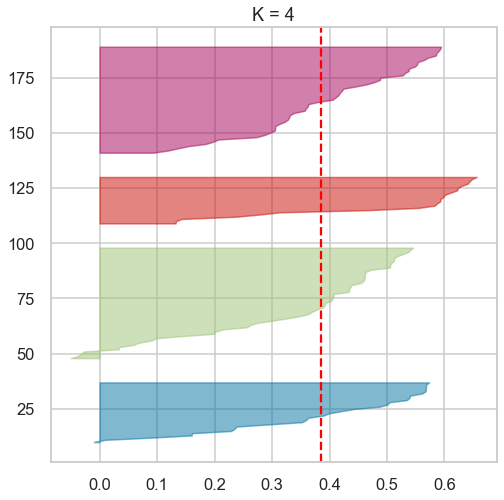

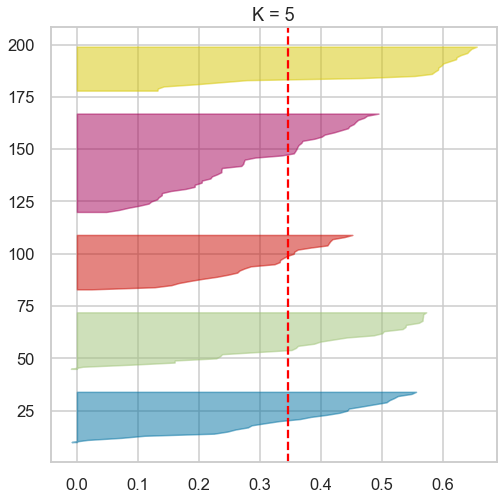

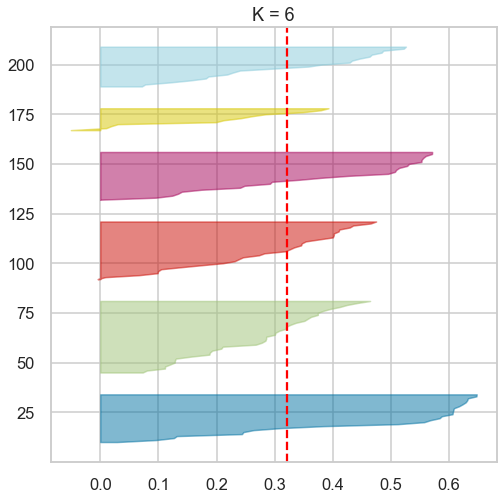

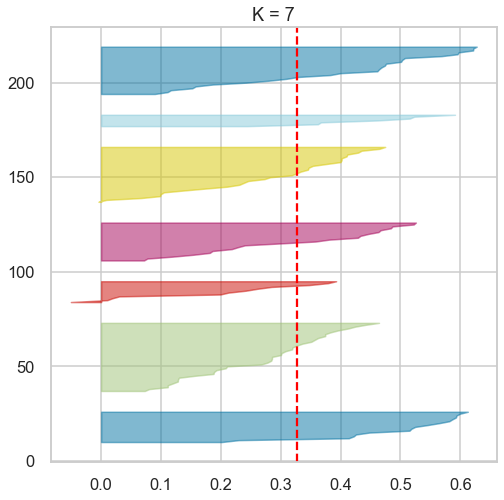

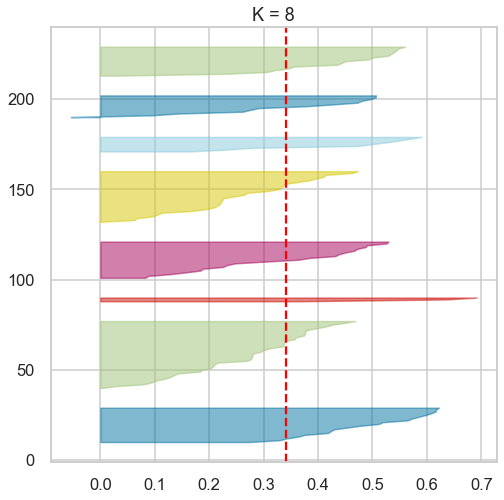

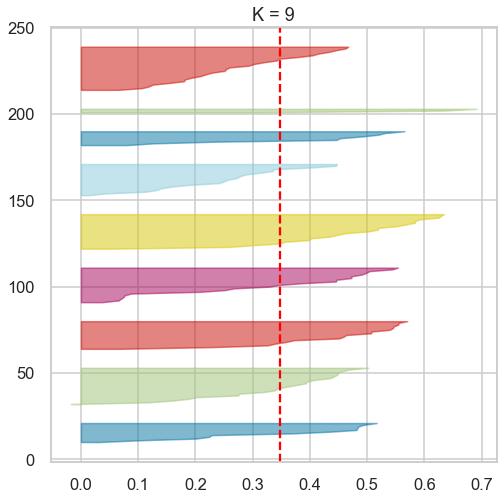

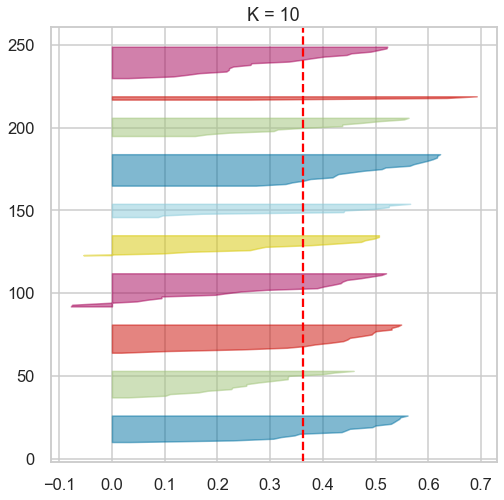

In [41]:
silhouette_Kmeans_scaled_2 , best_scaled_K2 = Kmeans_performance(iris_x_scaled)

In [42]:
print('best_silhouette_score = '+ str(round(silhouette_Kmeans_scaled_2,3)) + ', best_K = '+ str(best_scaled_K2))

best_silhouette_score = 0.582, best_K = 2


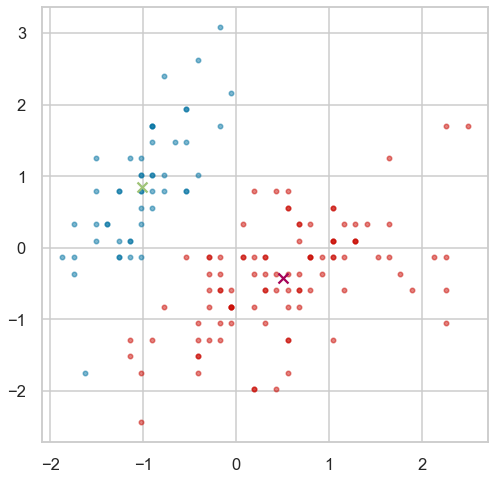

In [43]:
best_km_scaled_2 = KMeans(n_clusters = best_scaled_K2, random_state=0).fit(iris_x_scaled)
plt.figure()
display_cluster(iris_x_scaled ,km = best_km_scaled_2,  num_clusters=best_scaled_K2)

### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

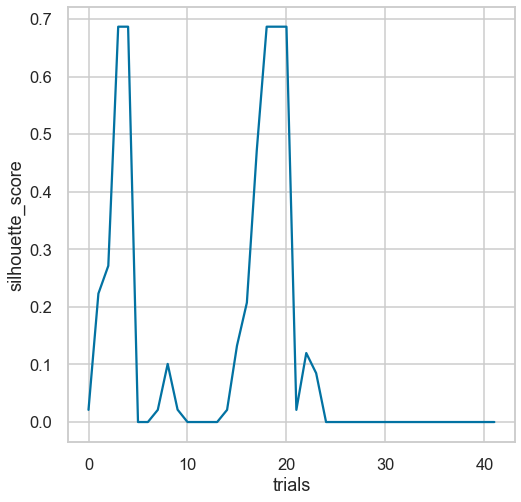

In [44]:
Distance_threshold = [0.1, 0.3, 0.5, 3, 4, 5, 6]
silhouette_ac_2 , best_ac_params2 = AgglomerativeClustering_performance(iris_x,
                                                                        Distance_threshold = [0.1, 0.3, 0.5, 3, 4, 5, 6])

In [45]:
silhouette_ac_2 , best_ac_params2

(0.6867350732769777,
 {'affinity': 'euclidean',
  'compute_distances': False,
  'compute_full_tree': 'auto',
  'connectivity': None,
  'distance_threshold': 3,
  'linkage': 'average',
  'memory': None,
  'n_clusters': None})

### now , scaled ..

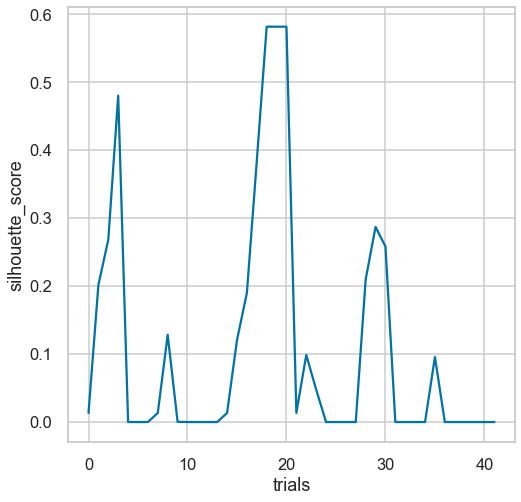

In [46]:
Distance_threshold = [0.1, 0.3, 0.5, 3, 4, 5, 6]
silhouette_ac_sclaed_2 , best_ac_scaled_params2 = AgglomerativeClustering_performance(iris_x_scaled,
                                                                                     Distance_threshold = [0.1, 0.3, 0.5, 3, 4, 5, 6])

In [47]:
silhouette_ac_sclaed_2 , best_ac_scaled_params2

(0.5817500491982808,
 {'affinity': 'manhattan',
  'compute_distances': False,
  'compute_full_tree': 'auto',
  'connectivity': None,
  'distance_threshold': 4,
  'linkage': 'average',
  'memory': None,
  'n_clusters': None})

n_clusters = 2
silhouette_score = 0.582


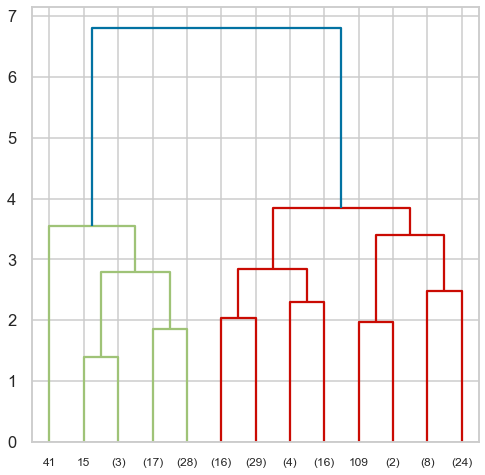

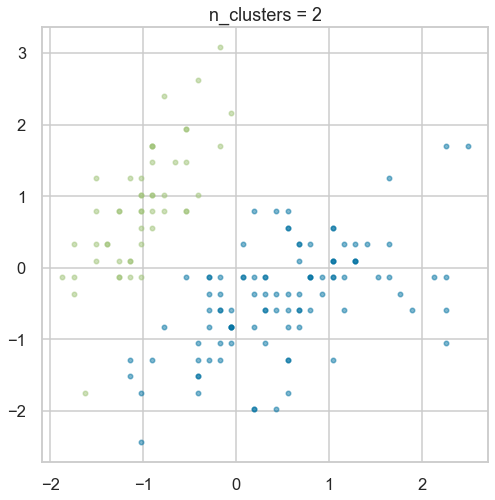

In [48]:
best_ac2_scaled = AgglomerativeClustering(n_clusters=None, affinity=best_ac_scaled_params2['affinity'],
                                          linkage=best_ac_scaled_params2['linkage'],
                                          distance_threshold=best_ac_scaled_params2['distance_threshold']).fit(iris_x_scaled)

plt.figure()
plot_dendrogram(best_ac2_scaled, truncate_mode="level", p=3)

print('n_clusters = '+ str(best_ac2_scaled.n_clusters_))

plt.figure()
display_cluster(iris_x_scaled ,km =best_ac2_scaled, num_clusters = best_ac2_scaled.n_clusters_)
plt.title('n_clusters = '+ str(best_ac2_scaled.n_clusters_))
print('silhouette_score = ' + str(round(silhouette_score(iris_x_scaled, best_ac2_scaled.labels_),3)))

### DBScan
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments 

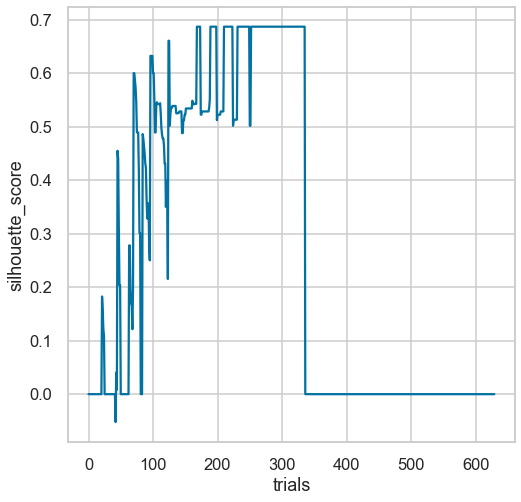

In [49]:
silhouette_db_2 , best_db_params2 = DBScan_performance(iris_x)

In [50]:
silhouette_db_2 , best_db_params2

(0.6867350732769777,
 {'algorithm': 'auto',
  'eps': 0.9,
  'leaf_size': 30,
  'metric': 'euclidean',
  'metric_params': None,
  'min_samples': 5,
  'n_jobs': None,
  'p': None})

Text(0.5, 1.0, 'n_clusters = 2, eps = 0.9, min_samples = 5, silhouette = 0.687')

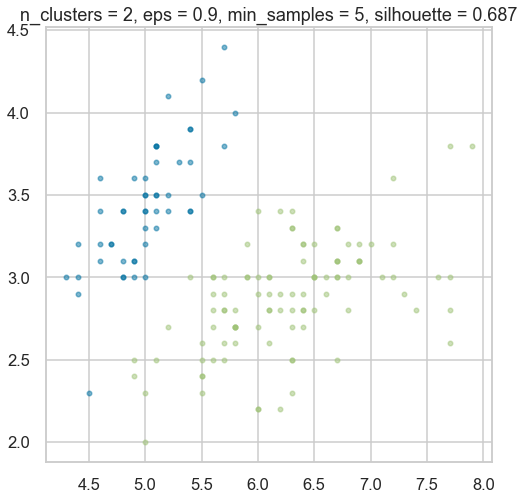

In [51]:
best_db2 = DBSCAN(eps = best_db_params2['eps'], min_samples= best_db_params2['min_samples']).fit(iris_x)

labels = best_db2.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

display_cluster(iris_x,km = best_db2, num_clusters= n_clusters_)  

plt.title('n_clusters = '+ str(n_clusters_)+', eps = ' + str(best_db_params2['eps']) 
          + ', min_samples = '+ str(best_db_params2['min_samples'])+ 
                  ', silhouette = '  + str(round(silhouette_score(iris_x, best_db2.labels_),3)))

### now , scaled ..

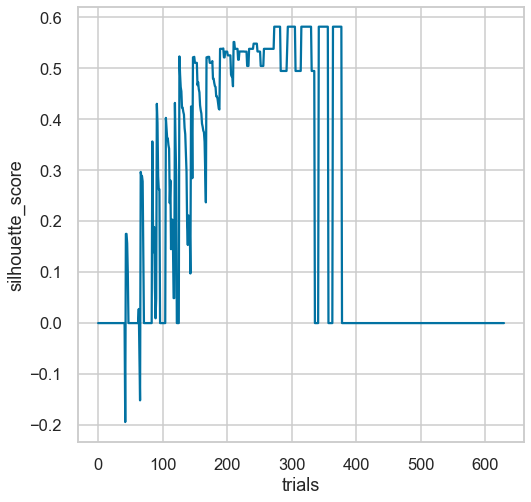

In [52]:
silhouette_db_scaled_2 , best_db_scaled_params2 = DBScan_performance(iris_x_scaled)

In [53]:
silhouette_db_scaled_2 , best_db_scaled_params2

(0.5817500491982808,
 {'algorithm': 'auto',
  'eps': 1.4000000000000001,
  'leaf_size': 30,
  'metric': 'euclidean',
  'metric_params': None,
  'min_samples': 5,
  'n_jobs': None,
  'p': None})

Text(0.5, 1.0, 'n_clusters = 2, eps = 1.4000000000000001, min_samples = 5, silhouette = 0.582')

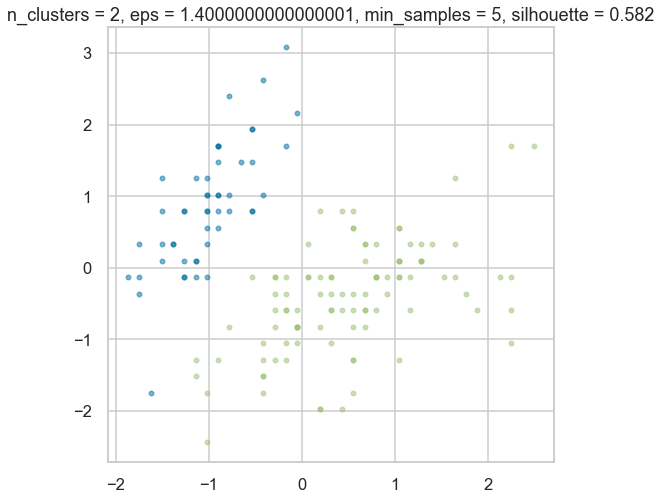

In [54]:
best_db2_scaled = DBSCAN(eps = best_db_scaled_params2['eps'],
                         min_samples= best_db_scaled_params2['min_samples']).fit(iris_x_scaled)

labels = best_db2_scaled.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

display_cluster(iris_x_scaled, km = best_db2_scaled, num_clusters= n_clusters_)  

plt.title('n_clusters = '+ str(n_clusters_)+', eps = ' + str(best_db_scaled_params2['eps']) 
          + ', min_samples = '+ str(best_db_scaled_params2['min_samples'])+ 
                  ', silhouette = '  + str(round(silhouette_score(iris_x_scaled, best_db2_scaled.labels_),3)))

### Gaussian Mixture
* Use GaussianMixture function to cluster the above data 
* In GMM change the covariance_type and check the difference in the resulting proabability fit 
* Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 

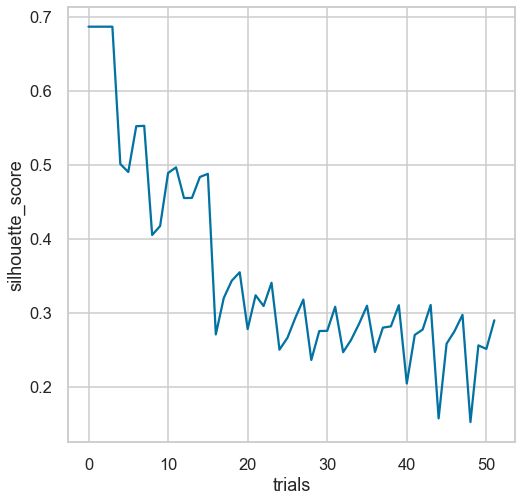

In [55]:
silhouette_gmm_2, best_gmm_params2 = Gaussian_Mixture_performance(iris_x)

In [56]:
silhouette_gmm_2, best_gmm_params2

(0.6867350732769777,
 {'covariance_type': 'full',
  'init_params': 'kmeans',
  'max_iter': 100,
  'means_init': None,
  'n_components': 2,
  'n_init': 1,
  'precisions_init': None,
  'random_state': 0,
  'reg_covar': 1e-06,
  'tol': 0.001,
  'verbose': 0,
  'verbose_interval': 10,
  'warm_start': False,
  'weights_init': None})

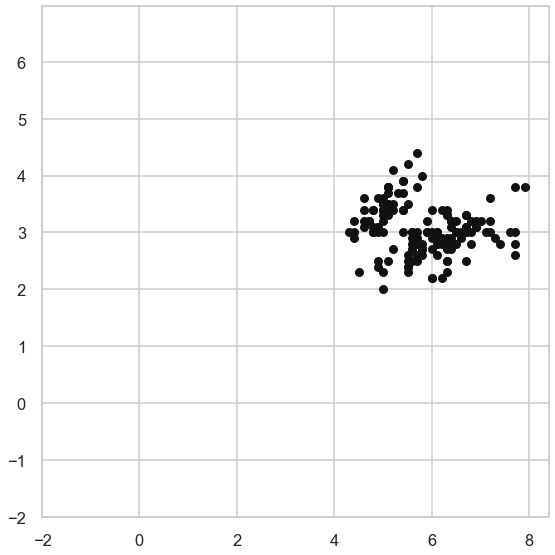

In [57]:
best_gmm2 = GaussianMixture(n_components= best_gmm_params2['n_components'], 
                      covariance_type= best_gmm_params2['covariance_type']).fit(iris_x)

plot_contours(iris_x, best_gmm2, best_gmm2.means_, best_gmm2.covariances_, title="")

### now , scaled ..

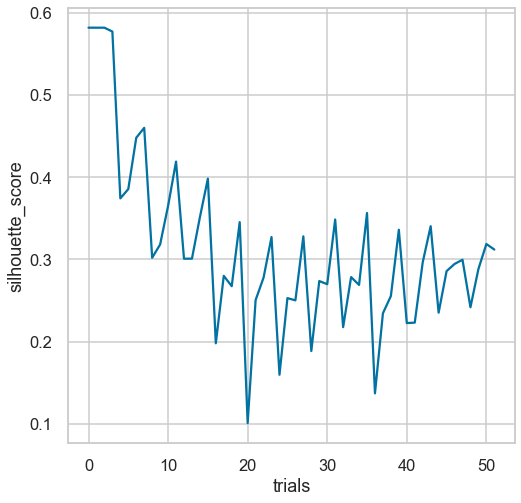

In [58]:
silhouette_gmm_scaled_2, best_gmm_scaled_params2 = Gaussian_Mixture_performance(iris_x_scaled)

In [59]:
silhouette_gmm_scaled_2, best_gmm_scaled_params2

(0.5817500491982808,
 {'covariance_type': 'full',
  'init_params': 'kmeans',
  'max_iter': 100,
  'means_init': None,
  'n_components': 2,
  'n_init': 1,
  'precisions_init': None,
  'random_state': 0,
  'reg_covar': 1e-06,
  'tol': 0.001,
  'verbose': 0,
  'verbose_interval': 10,
  'warm_start': False,
  'weights_init': None})

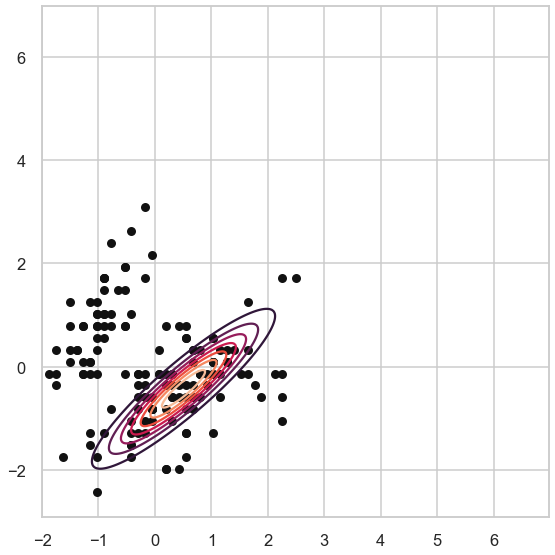

In [60]:
best_gmm2_scaled = GaussianMixture(n_components= best_gmm_scaled_params2['n_components'], 
                      covariance_type= best_gmm_scaled_params2['covariance_type']).fit(iris_x_scaled)

plot_contours(iris_x_scaled, best_gmm2_scaled, best_gmm2_scaled.means_, best_gmm2_scaled.covariances_, title="")

## Customer dataset
Repeat all the above on the customer data set 

In [61]:
customer_data = pd.read_csv('Customer data.csv')
customer_data

ID  Sex  Marital status  Age  Education  Income  Occupation  \
0     100000001    0               0   67          2  124670           1   
1     100000002    1               1   22          1  150773           1   
2     100000003    0               0   49          1   89210           0   
3     100000004    0               0   45          1  171565           1   
4     100000005    0               0   53          1  149031           1   
...         ...  ...             ...  ...        ...     ...         ...   
1995  100001996    1               0   47          1  123525           0   
1996  100001997    1               1   27          1  117744           1   
1997  100001998    0               0   31          0   86400           0   
1998  100001999    1               1   24          1   97968           0   
1999  100002000    0               0   25          0   68416           0   

      Settlement size  
0                   2  
1                   2  
2                   0  
3                   1  
4                   1  
...               ...  
1995                0  
1996                0  
1997                0  
1998                0  
1999                0  

[2000 rows x 8 columns]

In [62]:
customer_data = np.array((customer_data))

In [63]:
customer_data_scaled = scaler.fit_transform(customer_data)

### Kmeans 
* Use Kmeans with different values of K to cluster the above data 
* Display the outcome of each value of K 
* Plot distortion function versus K and choose the approriate value of k 
* Plot the silhouette_score versus K and use it to choose the best K 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 

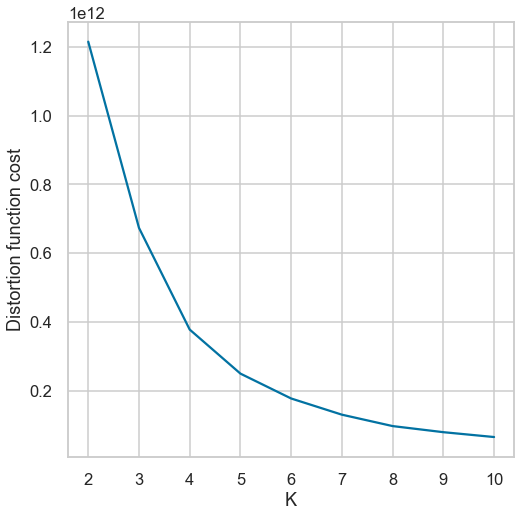

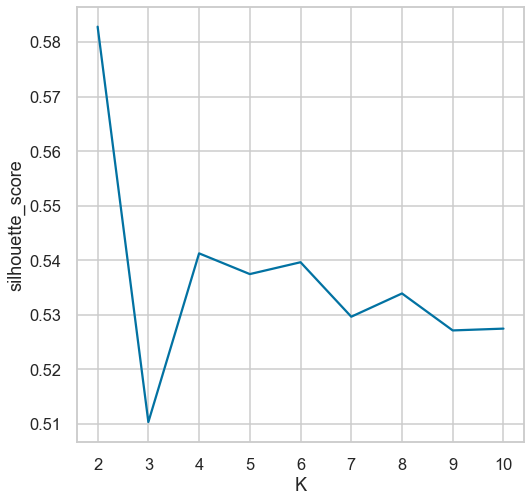

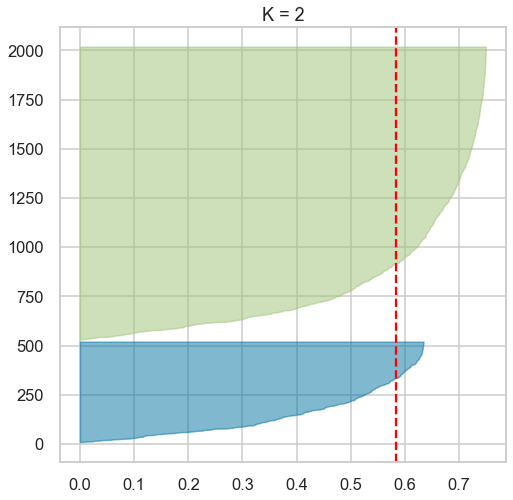

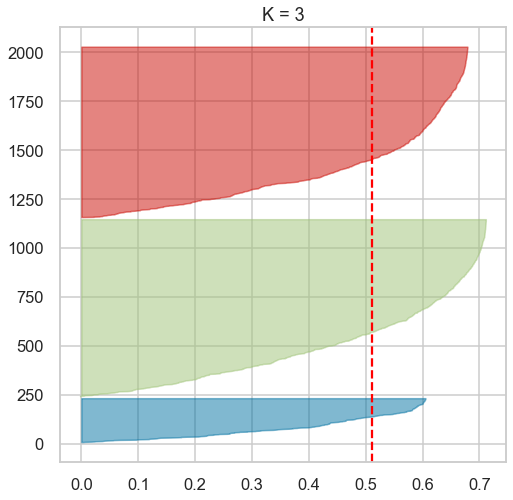

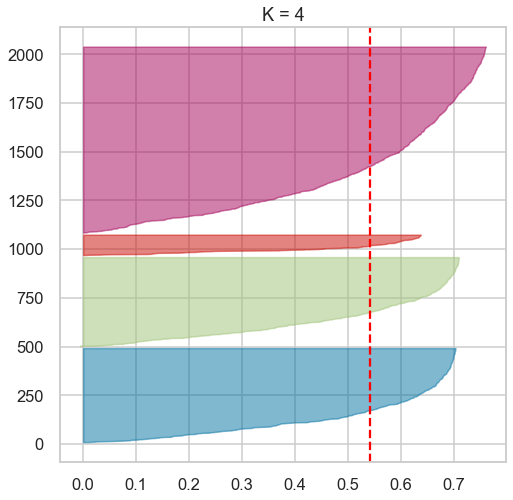

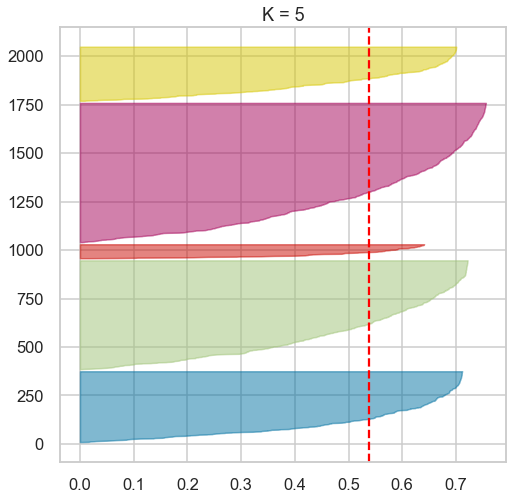

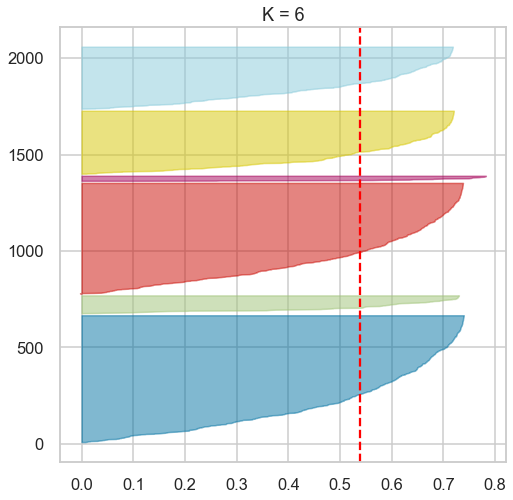

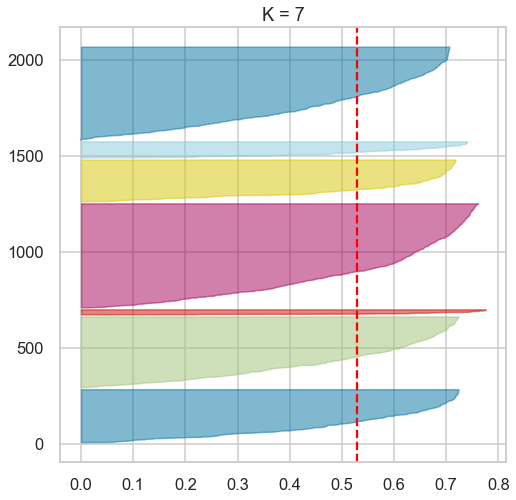

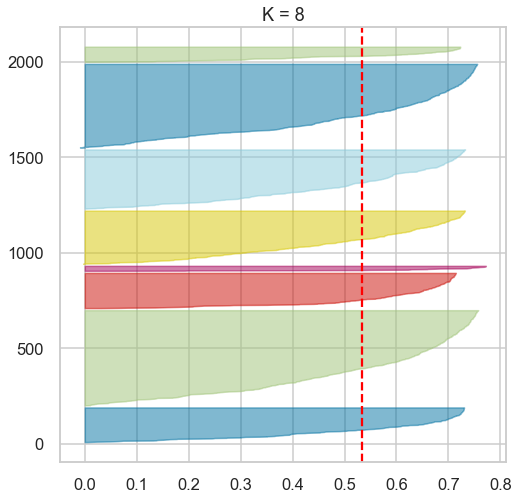

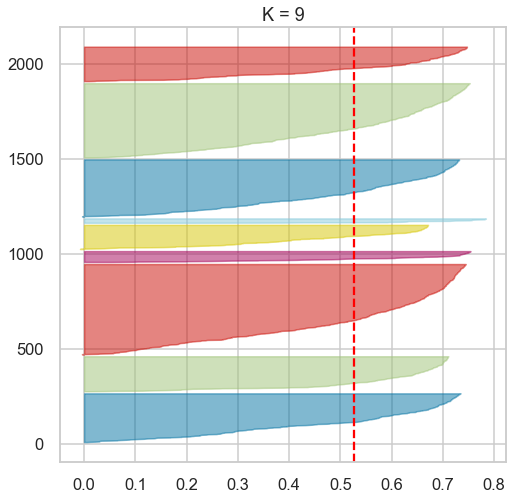

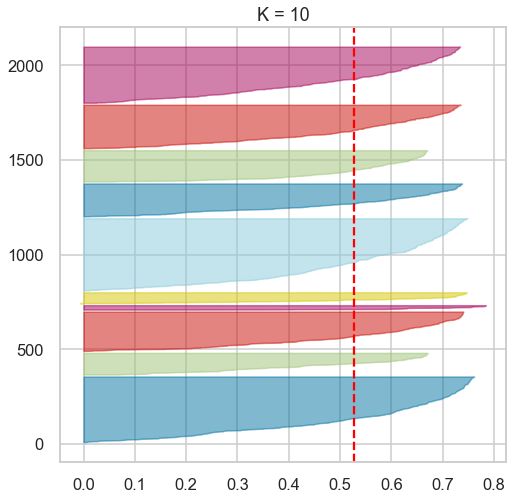

In [64]:
silhouette_Kmeans_3 , best_K3 = Kmeans_performance(customer_data)

In [65]:
print('best_silhouette_score = '+ str(round(silhouette_Kmeans_3,3)) + ', best_K = '+ str(best_K3))

best_silhouette_score = 0.583, best_K = 2


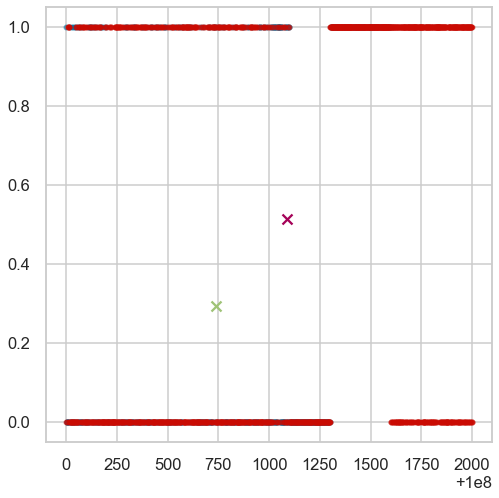

In [66]:
best_km_3 = KMeans(n_clusters = best_K3, random_state=0).fit(customer_data)
plt.figure()
display_cluster(customer_data ,km = best_km_3,  num_clusters=best_K3)

### now , scaled ..

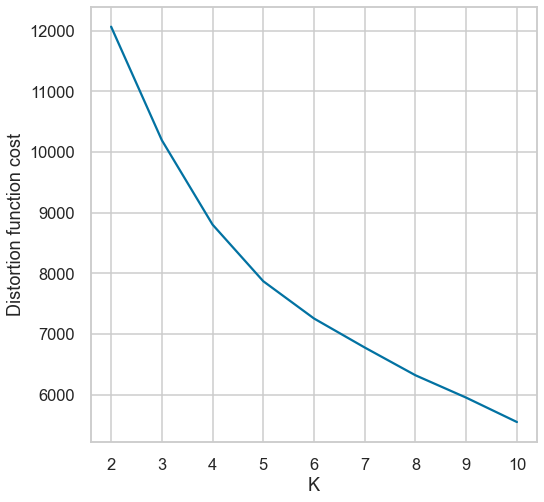

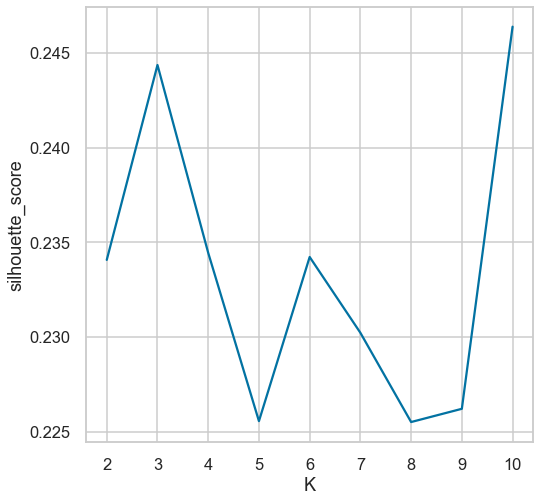

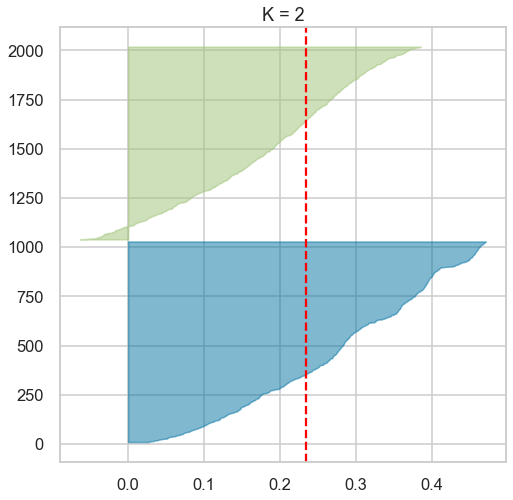

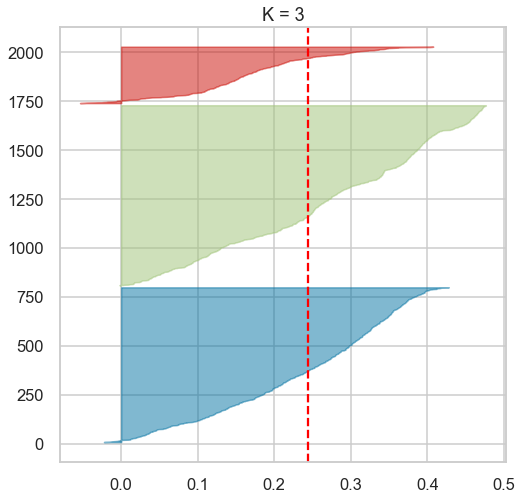

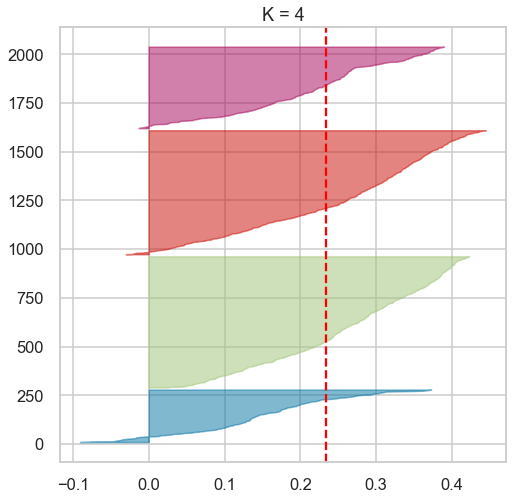

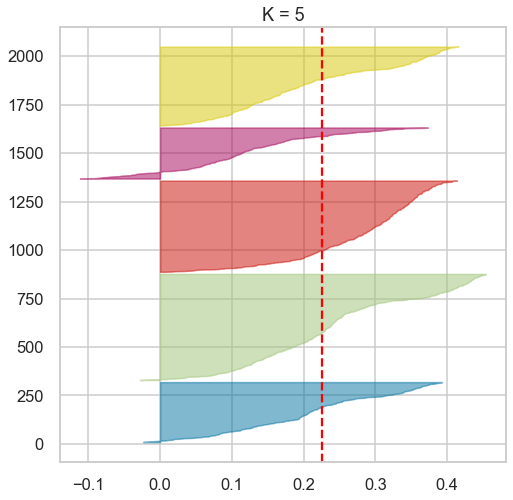

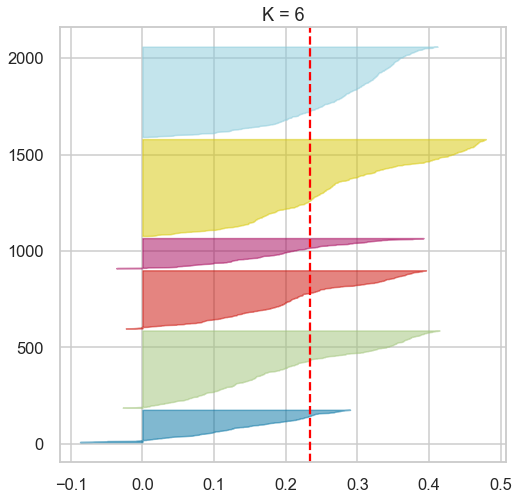

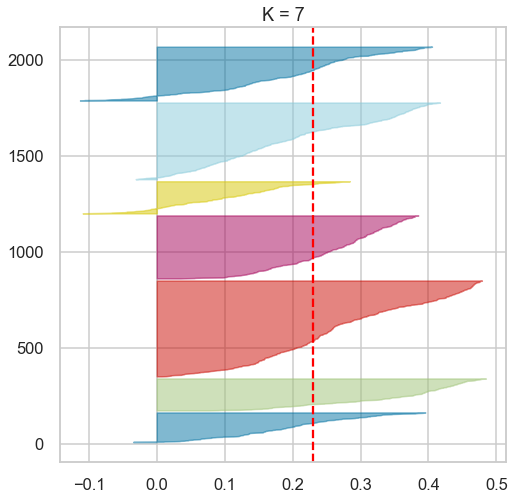

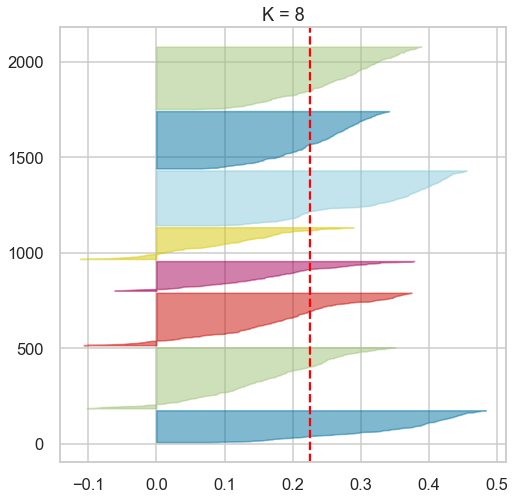

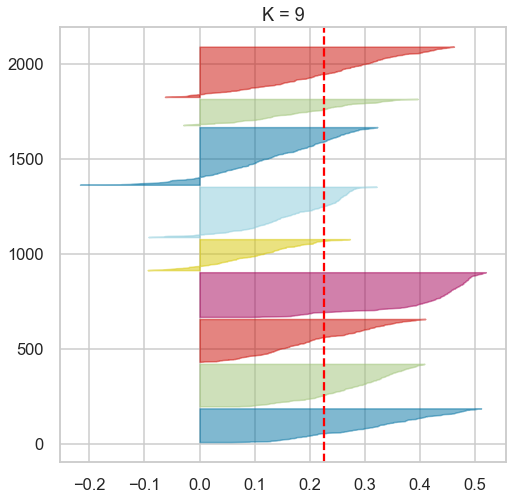

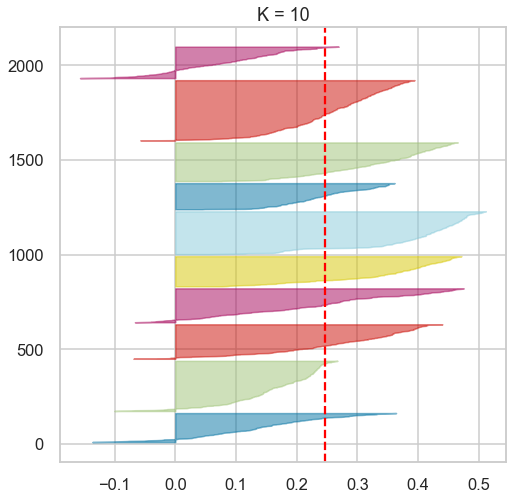

In [67]:
silhouette_Kmeans_scaled_3 , best_scaled_K3 = Kmeans_performance(customer_data_scaled)

In [68]:
print('best_silhouette_score = '+ str(round(silhouette_Kmeans_scaled_3,3)) + ', best_K = '+ str(best_scaled_K3))

best_silhouette_score = 0.246, best_K = 10


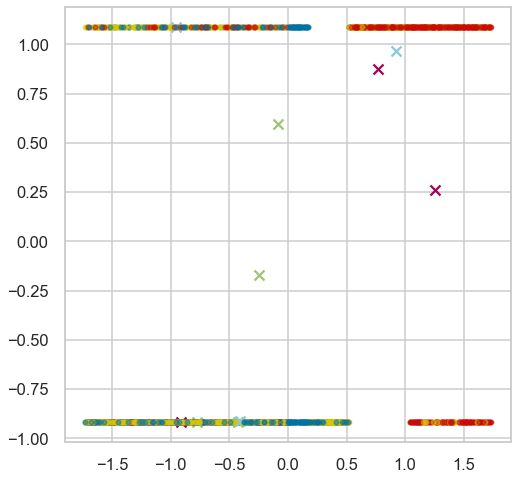

In [69]:
best_km_scaled_3 = KMeans(n_clusters = best_scaled_K3, random_state=0).fit(customer_data_scaled)
plt.figure()
display_cluster(customer_data_scaled ,km = best_km_scaled_3,  num_clusters=best_scaled_K3)

### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

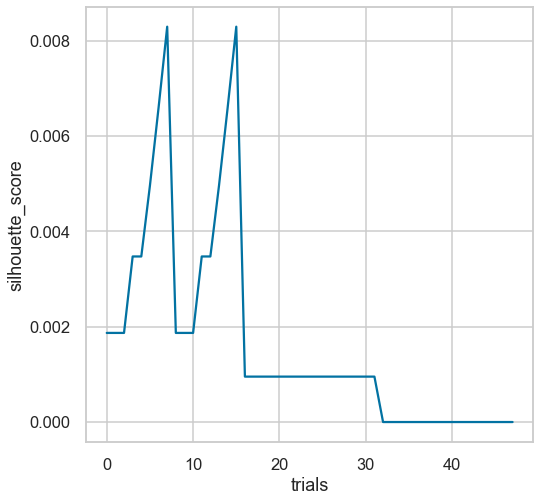

In [70]:
Distance_threshold = [13, 14, 15, 16, 17, 18, 19, 20]
silhouette_ac_3 , best_ac_params3 = AgglomerativeClustering_performance(customer_data, Distance_threshold = Distance_threshold )

In [71]:
silhouette_ac_3 , best_ac_params3

(0.00829334114171494,
 {'affinity': 'euclidean',
  'compute_distances': False,
  'compute_full_tree': 'auto',
  'connectivity': None,
  'distance_threshold': 20,
  'linkage': 'average',
  'memory': None,
  'n_clusters': None})

n_clusters = 1990
silhouette_score = 0.008


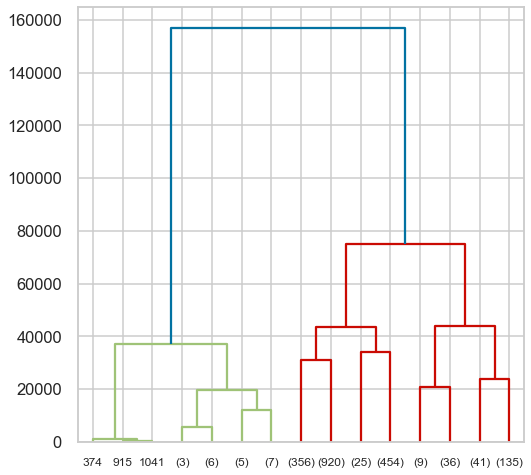

In [72]:
best_ac3 = AgglomerativeClustering(n_clusters=None, affinity=best_ac_params3['affinity'],
                                          linkage=best_ac_params3['linkage'],
                                          distance_threshold=best_ac_params3['distance_threshold']).fit(customer_data)

plt.figure()
plot_dendrogram(best_ac3, truncate_mode="level", p=3)

print('n_clusters = '+ str(best_ac3.n_clusters_))
print('silhouette_score = ' + str(round(silhouette_score(customer_data, best_ac3.labels_),3)))

### now , scaled ..

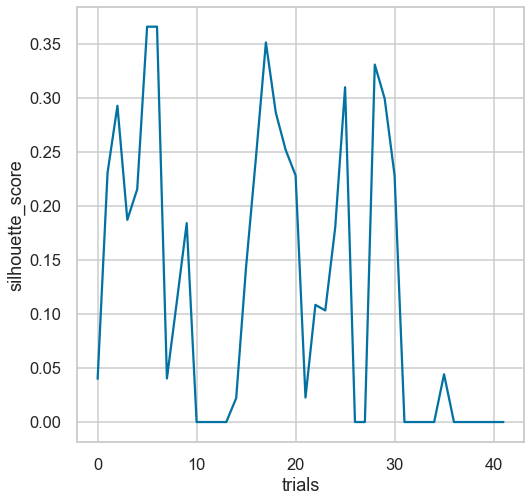

In [73]:
Distance_threshold = [0.1, 0.3, 0.5, 3, 4, 5, 6]
silhouette_ac_scaled_3 , best_ac_scaled_params3 = AgglomerativeClustering_performance(customer_data_scaled,
                                                                                      Distance_threshold=Distance_threshold)

In [74]:
silhouette_ac_scaled_3 , best_ac_scaled_params3

(0.36592852067351805,
 {'affinity': 'euclidean',
  'compute_distances': False,
  'compute_full_tree': 'auto',
  'connectivity': None,
  'distance_threshold': 5,
  'linkage': 'average',
  'memory': None,
  'n_clusters': None})

n_clusters = 2
silhouette_score = 0.366


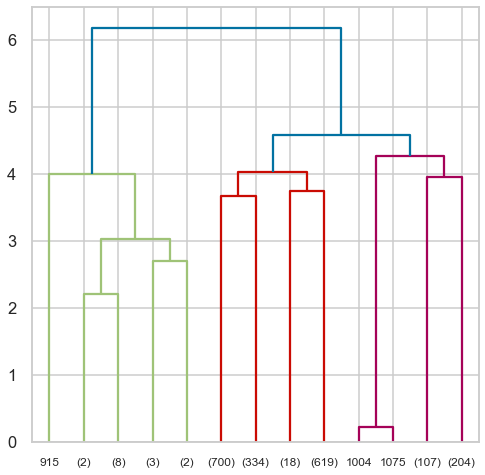

In [75]:
best_ac3_scaled = AgglomerativeClustering(n_clusters=None, affinity=best_ac_scaled_params3['affinity'],
                                          linkage=best_ac_scaled_params3['linkage'],
                                          distance_threshold=best_ac_scaled_params3['distance_threshold']).fit(customer_data_scaled)

plt.figure()
plot_dendrogram(best_ac3_scaled, truncate_mode="level", p=3)

print('n_clusters = '+ str(best_ac3_scaled.n_clusters_))
print('silhouette_score = ' + str(round(silhouette_score(customer_data_scaled, best_ac3_scaled.labels_),3)))

### DBScan
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments 

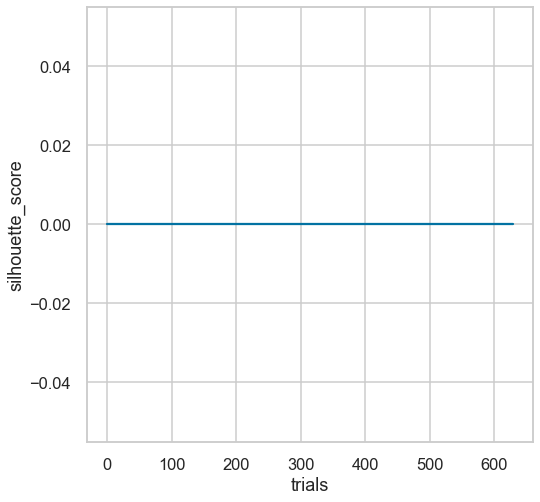

In [76]:
silhouette_db_3 , best_db_params3 = DBScan_performance(customer_data)

In [77]:
silhouette_db_3 , best_db_params3

(0.0, {})

### now , scaled ..

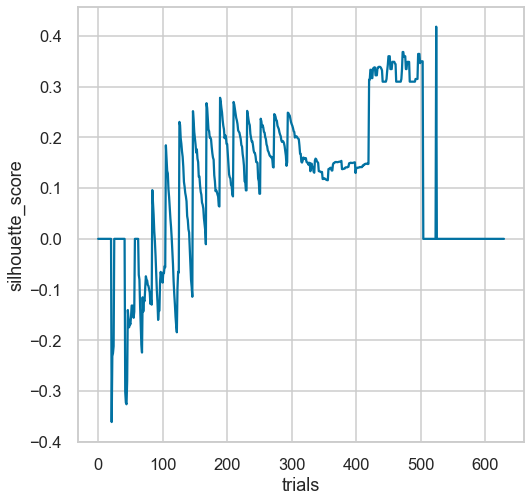

In [78]:
silhouette_db_scaled_3 , best_db_scaled_params3 = DBScan_performance(customer_data_scaled)

In [79]:
silhouette_db_scaled_3 , best_db_scaled_params3

(0.41831533424851236,
 {'algorithm': 'auto',
  'eps': 2.5000000000000004,
  'leaf_size': 30,
  'metric': 'euclidean',
  'metric_params': None,
  'min_samples': 25,
  'n_jobs': None,
  'p': None})

In [80]:
best_db3_scaled = DBSCAN(eps = best_db_scaled_params2['eps'],
                         min_samples= best_db_scaled_params2['min_samples']).fit(customer_data_scaled)

labels = best_db3_scaled.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

n_clusters_

30

### Gaussian Mixture
* Use GaussianMixture function to cluster the above data 
* In GMM change the covariance_type and check the difference in the resulting proabability fit 
* Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 

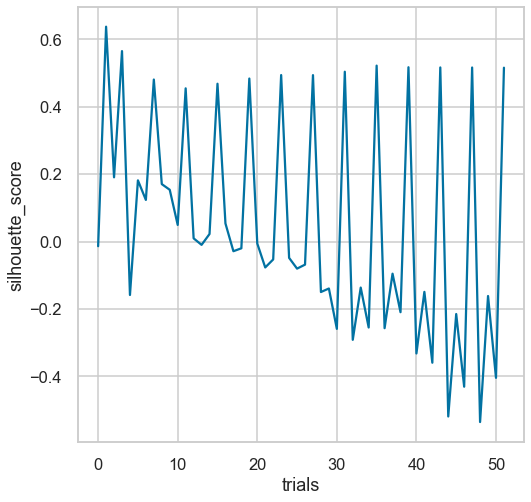

In [81]:
silhouette_gmm_3, best_gmm_params3 = Gaussian_Mixture_performance(customer_data)

In [82]:
silhouette_gmm_3, best_gmm_params3

(0.6373718567082967,
 {'covariance_type': 'tied',
  'init_params': 'kmeans',
  'max_iter': 100,
  'means_init': None,
  'n_components': 2,
  'n_init': 1,
  'precisions_init': None,
  'random_state': 0,
  'reg_covar': 1e-06,
  'tol': 0.001,
  'verbose': 0,
  'verbose_interval': 10,
  'warm_start': False,
  'weights_init': None})

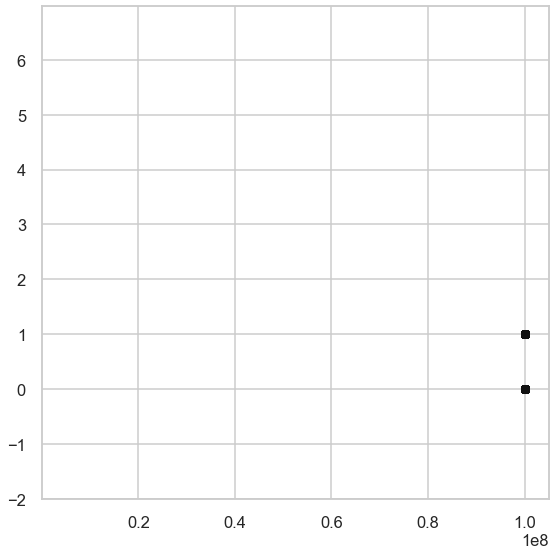

In [83]:
best_gmm3 = GaussianMixture(n_components= best_gmm_params3['n_components'], 
                      covariance_type= best_gmm_params3['covariance_type']).fit(customer_data)

plot_contours(customer_data, best_gmm3, best_gmm3.means_, best_gmm3.covariances_, title="")

### now , scaled ..

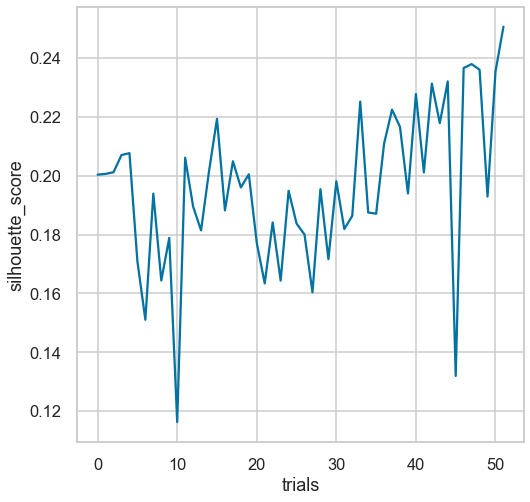

In [84]:
silhouette_gmm_scaled_3, best_gmm_scaled_params3 = Gaussian_Mixture_performance(customer_data_scaled)

In [85]:
silhouette_gmm_scaled_3, best_gmm_scaled_params3

(0.25070632198754034,
 {'covariance_type': 'spherical',
  'init_params': 'kmeans',
  'max_iter': 100,
  'means_init': None,
  'n_components': 14,
  'n_init': 1,
  'precisions_init': None,
  'random_state': 0,
  'reg_covar': 1e-06,
  'tol': 0.001,
  'verbose': 0,
  'verbose_interval': 10,
  'warm_start': False,
  'weights_init': None})

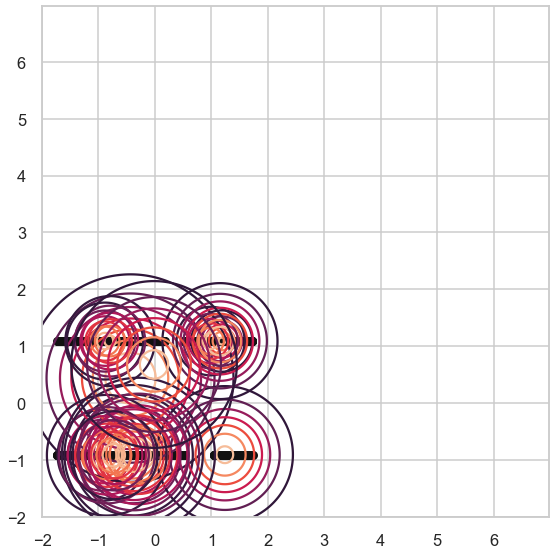

In [86]:
best_gmm3_scaled = GaussianMixture(n_components= best_gmm_scaled_params3['n_components'], 
                      covariance_type= best_gmm_scaled_params3['covariance_type']).fit(customer_data_scaled)

plot_contours(customer_data_scaled, best_gmm3_scaled, best_gmm3_scaled.means_, best_gmm3_scaled.covariances_, title="")